# Digital Marketing Strategy
## "What determinants could videogame publishers use to improve their Customer Engagement on the social media platforms of Instagram and Facebook?"

## Set up the dataset path and import/install necessary libraries
This step shows all imports and defines the path of the dataset in one location, minimizing repetition.

In [1]:
# This is the root path where the dataset file is stored. 
dataset_path = ('/Users/jimdoves/Desktop/Master Digital Driven Business/Digital Marketing Strategy/DMS')

In [3]:
# The libaries that are used
import pandas as pd
import os
import numpy as np
import torch
from transformers import pipeline
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pymer4.models import Lmer
import scipy.stats as stats
from scipy.stats import kruskal
import scikit_posthocs as sp

# settings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



## Exploratory Data Analysis, Data Cleaning and Feature Engineering

In [4]:
# Load the datasets
FB_data = pd.read_excel(os.path.join(dataset_path, "combined_FB_datasets.xlsx"))
IG_data = pd.read_excel(os.path.join(dataset_path, "combined_IG_datasets.xlsx"))

#Display the first and the last rows of the datasets
display(FB_data.head())
display(FB_data.tail())
display(IG_data.head())
display(IG_data.tail())

#Display information about the datasets
print('Original length of FB dataframe:', len(FB_data))
print('Original length of IG dataframe:', len(IG_data))
display("There are {} rows and {} columns in the FB dataset".format(FB_data.shape[0], FB_data.shape[1]))
display("There are {} rows and {} columns in the IG dataset".format(IG_data.shape[0], IG_data.shape[1]))
display("Datatypes FB dataset:", FB_data.dtypes) 
display("Datatypes IG dataset:", IG_data.dtypes)
missing_valuesFB = FB_data.isnull().sum()
missing_valuesIG = IG_data.isnull().sum()
print("Missing values per column in the FB dataset:\n", missing_valuesFB)
print("Missing values per column in the IG dataset:\n", missing_valuesIG)

,date,message,profile,network,number of followers,number of likes,total likes(including positive emoji likes),number of comments,number of comments (primary),shares per post,...,number of thankful,number of wow,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links
0,2021-12-31 18:00:03,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,190,25,...,0,1,0.305419,0.054187,0.004511,0.005444,91127584852_10160103901729853,91127584852,https://www.facebook.com/insomniacgames/photos...,NaN
1,2021-12-31 16:00:03,Fungi and ferns and moths and Fireflies -- the...,"Naughty Dog, LLC",FACEBOOK,1506484,850,1138,14,14,57,...,0,2,0.5,0.071429,0.000803,0.000888,57327290245_10165832084200246,57327290245,https://www.facebook.com/naughtydog/photos/a.1...,NaN
2,2021-12-31 16:00:02,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,15,12,...,0,1,0.458333,0.375,0.000183,0.00021,59916854460_10159833755834461,59916854460,https://www.facebook.com/SquareEnix/photos/a.1...,NaN
3,2021-12-31 14:00:01,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,48,106,...,0,1,0.48,0.36,0.00046,0.000606,59916854460_10159832301434461,59916854460,https://www.facebook.com/867403448085191/video...,NaN
4,2021-12-31 13:00:17,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,164,128,...,0,3,0.565421,0.17757,0.019262,0.020235,283103815139159_4671320582984105,283103815139159,https://www.facebook.com/283103815139159/posts...,NaN


,date,message,profile,network,number of followers,number of likes,total likes(including positive emoji likes),number of comments,number of comments (primary),shares per post,...,number of thankful,number of wow,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links
11817,2024-01-02 17:01:08,"The Rules of Valhalla: Preparation \n\n""The ch...",Santa Monica Studio,FACEBOOK,0,644,922,29,19,18,...,0,2,0.310345,0.206897,0.006946,0.007412,404310782934653_888976556564295,404310782934653,https://www.facebook.com/739147731547179/posts...,NaN
11818,2024-01-02 16:00:27,Who's excited to take on new and familiar foes...,Square Enix,FACEBOOK,0,647,880,76,50,65,...,0,16,0.513158,0.184211,0.000932,0.00112,59916854460_982334366592098,59916854460,https://www.facebook.com/867403448085191/video...,NaN
11819,2024-01-02 15:20:29,what have you been playing over the holidays?,Ubisoft,FACEBOOK,0,306,381,926,800,18,...,0,1,0.316415,0.336933,0.000633,0.001092,81174647292_929205918563949,81174647292,https://www.facebook.com/820219539462588/posts...,NaN
11820,2024-01-02 13:21:51,Take caution when you're out in the wilds. \n\...,Guerrilla Games,FACEBOOK,0,280,358,1,1,3,...,0,0,-,-,0.001844,0.001879,179751088724627_920688956093823,179751088724627,https://www.facebook.com/777512863744767/posts...,NaN
11821,2024-01-01 18:04:40,New Year hype! What are you looking forward to...,Insomniac Games,FACEBOOK,0,696,1074,204,135,26,...,0,3,0.455882,0.102941,0.004428,0.005298,91127584852_754198763404083,91127584852,https://www.facebook.com/459736079517021/video...,NaN


,date,message,profile,network,number of followers,number of likes,number of comments,"reactions, comments & shares",number of posts,picture posts,video-posts,engagement,message-id,profile-id,link,external links
0,2021-12-31 18:00:07,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,8485,1,1,0,0.014204,18159887410207560,302534790,https://www.instagram.com/p/CYKA__hjRC2/,NaN
1,2021-12-31 16:00:11,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,20027,1,1,0,0.016569,17918878019040680,1593309399,https://www.instagram.com/p/CYJzRfyAaSI/,NaN
2,2021-12-31 14:01:05,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,3246,1,0,1,0.003063,17864704832649000,2117884847,https://www.instagram.com/tv/CYJlmkOhnw0/,NaN
3,2021-12-30 18:01:10,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,42351,1,1,0,0.070946,17902246271425140,302534790,https://www.instagram.com/p/CYHcUnih3H8/,NaN
4,2021-12-30 15:09:00,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,159037,1,1,0,0.007325,18189250981149360,184595688,https://www.instagram.com/p/CYHInoNtmzo/,NaN


,date,message,profile,network,number of followers,number of likes,number of comments,"reactions, comments & shares",number of posts,picture posts,video-posts,engagement,message-id,profile-id,link,external links
8589,2024-01-02 18:01:09,"As the New Year gets underway, we’re celebrati...",Square Enix,INSTAGRAM,1063757,14512,236,14748,1,1,0,0.01421,18022233265771192,2117884847,https://www.instagram.com/p/C1m2_7Ivi22/,NaN
8590,2024-01-02 17:00:57,"The Rules of Valhalla: Preparation \n\n""The ch...",Santa Monica Studio,INSTAGRAM,749452,13476,44,13520,1,1,0,0.01839,18126621253321340,51722578,https://www.instagram.com/p/C1mwHEGOaNy/,NaN
8591,2024-01-02 15:24:05,Drop in comment ??,Ubisoft,INSTAGRAM,8015932,21231,3584,24815,1,1,0,0.003026,18017000852052740,507516414,https://www.instagram.com/p/C1mlB_aNJxh/,NaN
8592,2024-01-02 13:21:55,Take caution when you're out in the wilds. \n\...,Guerrilla,INSTAGRAM,288197,1792,14,1806,1,1,0,-,17950605668726090,615720220,https://www.instagram.com/p/C1mXC4UOPTt/,NaN
8593,2024-01-01 18:05:40,New Year hype! What are you looking forward to...,Insomniac Games,INSTAGRAM,981610,62239,832,63071,1,0,1,0.063939,18033210811685080,302534790,https://www.instagram.com/reel/C1kStT7uEbq/,NaN


Original length of FB dataframe: 11822
Original length of IG dataframe: 8594


'There are 11822 rows and 29 columns in the FB dataset'

'There are 8594 rows and 16 columns in the IG dataset'

'Datatypes FB dataset:'

date                                           datetime64[ns]
message                                                object
profile                                                object
network                                                object
number of followers                                     int64
number of likes                                         int64
total likes(including positive emoji likes)             int64
number of comments                                      int64
number of comments (primary)                            int64
shares per post                                         int64
reactions, comments & shares                            int64
number of posts                                         int64
picture posts                                          object
video-posts                                            object
number of haha                                          int64
number of love                                          int64
number o

'Datatypes IG dataset:'

date                            datetime64[ns]
message                                 object
profile                                 object
network                                 object
number of followers                      int64
number of likes                          int64
number of comments                       int64
reactions, comments & shares             int64
number of posts                          int64
picture posts                            int64
video-posts                              int64
engagement                              object
message-id                               int64
profile-id                               int64
link                                    object
external links                         float64
dtype: object

Missing values per column in the FB dataset:
 date                                               0
message                                          905
profile                                            0
network                                            0
number of followers                                0
number of likes                                    0
total likes(including positive emoji likes)        0
number of comments                                 0
number of comments (primary)                       0
shares per post                                    0
reactions, comments & shares                       0
number of posts                                    0
picture posts                                      0
video-posts                                        0
number of haha                                     0
number of love                                     0
number of angry                                    0
number of care                                     0


In [5]:
# Display summary statistics for numeric columns
print("\nSummary Statistics FB dataset:")
display(FB_data.describe())
print("\nSummary Statistics IG dataset:")
display(IG_data.describe())

# Display statistics for categorical columns
categorical_colsFB = FB_data.select_dtypes(include=['object']).columns
print(f"\nStatistics categorical in FB Dataset:")
display(FB_data[categorical_colsFB].describe())
categorical_colsIG = IG_data.select_dtypes(include=['object']).columns
print(f"\nStatistics categorical in IG Dataset:")
display(IG_data[categorical_colsIG].describe())


Summary Statistics FB dataset:


,date,number of followers,number of likes,total likes(including positive emoji likes),number of comments,number of comments (primary),shares per post,"reactions, comments & shares",number of posts,number of haha,number of love,number of angry,number of care,number of sad,number of thankful,number of wow,profile-id
count,11822,1.182200e+04,11822.000000,11822.000000,11822.000000,11822.000000,11822.000000,11822.00000,11822.0,11822.000000,11822.000000,11822.000000,11822.0,11822.000000,11822.0,11822.000000,1.182200e+04
mean,2022-11-26 00:56:32.127558656,2.515432e+06,969.448909,1437.025546,165.133395,107.548554,147.251988,1776.20851,1.0,53.902724,394.144815,9.634495,0.0,17.163086,0.0,19.529098,6.251111e+13
min,2020-12-31 23:00:04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5.175254e+10
25%,2021-12-22 16:37:36.500000,2.758880e+05,128.000000,166.000000,12.000000,9.000000,7.000000,206.00000,1.0,0.000000,28.000000,0.000000,0.0,0.000000,0.0,1.000000,5.991685e+10
50%,2022-10-22 19:25:21,1.457593e+06,345.000000,478.500000,35.000000,24.000000,20.000000,562.00000,1.0,2.000000,106.000000,0.000000,0.0,0.000000,0.0,2.000000,8.117465e+10
75%,2023-10-23 09:20:52.500000,1.793685e+06,876.750000,1230.000000,117.000000,72.000000,63.000000,1454.75000,1.0,11.000000,284.000000,2.000000,0.0,1.000000,0.0,6.000000,1.395385e+14
max,2024-12-31 17:01:05,1.390782e+07,284111.000000,557672.000000,49396.000000,35508.000000,179629.000000,787044.00000,1.0,31176.000000,231963.000000,7913.000000,0.0,99051.000000,0.0,40120.000000,4.043108e+14
std,NaN,3.725357e+06,4683.057792,8134.297878,845.617866,595.231750,2174.537225,11067.92452,0.0,461.507951,3148.439154,116.800360,0.0,944.372162,0.0,407.724600,1.063489e+14



Summary Statistics IG dataset:


,date,number of followers,number of likes,number of comments,"reactions, comments & shares",number of posts,picture posts,video-posts,message-id,profile-id,external links
count,8594,8.594000e+03,8.594000e+03,8594.000000,8.594000e+03,8594.0,8594.000000,8594.000000,8.594000e+03,8.594000e+03,0.0
mean,2023-01-10 10:52:48.036886528,4.203363e+06,3.037486e+04,410.154759,3.078502e+04,1.0,0.756342,0.243658,1.800790e+16,8.713148e+08,NaN
min,2020-12-31 23:00:07,6.348800e+04,0.000000e+00,0.000000,0.000000e+00,1.0,0.000000,0.000000,1.784222e+16,4.624896e+07,NaN
25%,2022-01-17 14:35:51.500000,8.078050e+05,3.051250e+03,34.000000,3.084250e+03,1.0,1.000000,0.000000,1.791867e+16,1.845957e+08,NaN
50%,2022-12-09 17:23:50,1.059895e+06,8.841000e+03,103.000000,8.959500e+03,1.0,1.000000,0.000000,1.797639e+16,5.075164e+08,NaN
75%,2024-01-31 09:08:24.750000128,1.352000e+06,2.894400e+04,321.000000,2.933075e+04,1.0,1.000000,0.000000,1.804537e+16,1.593309e+09,NaN
max,2024-12-31 17:01:07,2.928702e+07,6.774984e+06,102757.000000,6.877741e+06,1.0,1.000000,1.000000,1.848201e+16,2.117885e+09,NaN
std,NaN,7.880590e+06,1.170898e+05,1845.953005,1.188198e+05,0.0,0.429314,0.429314,1.269071e+14,8.150569e+08,NaN



Statistics categorical in FB Dataset:


,message,profile,network,picture posts,video-posts,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,link,external links
count,10917,11822,11822,11822,11822,11822,11822,11822,11822,11822,11822,180
unique,10838,11,1,2,2,3248,3172,11492,11500,11822,11822,178
top,??,Square Enix,FACEBOOK,1,-,-,0,-,-,91127584852_10160103901729853,https://www.facebook.com/insomniacgames/photos...,https://www.gamingheads.com/jak-3-statue.html
freq,8,3014,11822,7635,8080,1371,1431,269,269,1,1,2



Statistics categorical in IG Dataset:


,message,profile,network,engagement,link
count,8564,8594,8594,8594,8594
unique,8516,11,1,7790,8594
top,Drop in comment ??,Square Enix,INSTAGRAM,-,https://www.instagram.com/p/CYKA__hjRC2/
freq,7,2039,8594,803,1


#### Rename the columns

In [6]:
FB_data.rename(columns={"message": "caption","number of followers":"number_of_followers","number of likes":"number_of_likes","total likes(including positive emoji likes)":"total_likes","number of comments":"number_of_comments","picture posts":"picture_posts","video-posts":"video_posts"}, inplace=True)
IG_data.rename(columns={"message": "caption","number of followers":"number_of_followers","number of likes":"number_of_likes","number of comments":"number_of_comments","picture posts":"picture_posts","video-posts":"video_posts"}, inplace=True)

#### Replace - in the FB type of post columns to 0 

In [7]:
# Replace - with 0
FB_data['video_posts'] = FB_data['video_posts'].replace('-', 0)
FB_data['picture_posts'] = FB_data['picture_posts'].replace('-', 0)

FB_data['engagement'] = FB_data['engagement'].replace('-', 0)
IG_data['engagement'] = IG_data['engagement'].replace('-', 0)

#### Change the datatypes to the correct type

In [8]:
# Change to the correct datatypes
FB_data['caption'] = FB_data['caption'].astype('string')
FB_data['profile'] = FB_data['profile'].astype('category')
FB_data['network'] = FB_data['network'].astype('category')
FB_data['picture_posts'] = FB_data['picture_posts'].astype(int)
FB_data['video_posts'] = FB_data['video_posts'].astype(int)
FB_data['engagement'] = FB_data['engagement'].astype(float)
FB_data['link'] = FB_data['link'].astype('string')
FB_data['external links'] = FB_data['external links'].astype('string')

IG_data['caption'] = IG_data['caption'].astype('string')
IG_data['profile'] = IG_data['profile'].astype('category')
IG_data['network'] = IG_data['network'].astype('category')
IG_data['engagement'] = IG_data['engagement'].astype(float)
IG_data['link'] = IG_data['link'].astype('string')
IG_data['external links'] = IG_data['external links'].astype('string')

#### Splitting the column `Date` in Date and Time and add the column `Day` which contains the name of the day of the week.

In [9]:
# Splitting the column `Date` in date and time

# First ensuring that `date` the datatype datetime is:
FB_data["date"] = pd.to_datetime(FB_data["date"], errors="coerce")
IG_data["date"] = pd.to_datetime(IG_data["date"], errors="coerce")

# Create separate columns for date, time and day of the week(FB)
FB_data['day'] = FB_data['date'].dt.day_name()
FB_data['time'] = FB_data['date'].dt.time
FB_data['date'] = FB_data['date'].dt.date

# Create separate columns for date,time and day of the week (IG)
IG_data['day'] = IG_data['date'].dt.day_name()
IG_data['time'] = IG_data['date'].dt.time
IG_data['date'] = IG_data['date'].dt.date

# Set the new columns in the right sequence
FB_data = FB_data[["date", "time", "day"] + [col for col in FB_data.columns if col not in ["date", "time", "day"]]]
IG_data = IG_data[["date", "time", "day"] + [col for col in IG_data.columns if col not in ["date", "time", "day"]]]

# Ensure that time (hour) is treated as a numeric value and is rounded up to the closest hour
def round_to_nearest_hour(time_obj):
    hour = time_obj.hour
    minute = time_obj.minute
    if minute > 30:
        hour = (hour + 1) % 24 
    return f'{hour:02d}:00'
FB_data['time'] = FB_data['time'].apply(round_to_nearest_hour)
IG_data['time'] = IG_data['time'].apply(round_to_nearest_hour)

# Check the results
print("FB dataset:")
display(FB_data.head())

print("IG dataset:")
display(IG_data.head())

FB dataset:


,date,time,day,caption,profile,network,number_of_followers,number_of_likes,total_likes,number_of_comments,...,number of thankful,number of wow,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links
0,2021-12-31,18:00,Friday,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,...,0,1,0.305419,0.054187,0.004511,0.005444,91127584852_10160103901729853,91127584852,https://www.facebook.com/insomniacgames/photos...,<NA>
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,"Naughty Dog, LLC",FACEBOOK,1506484,850,1138,14,...,0,2,0.5,0.071429,0.000803,0.000888,57327290245_10165832084200246,57327290245,https://www.facebook.com/naughtydog/photos/a.1...,<NA>
2,2021-12-31,16:00,Friday,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,...,0,1,0.458333,0.375,0.000183,0.00021,59916854460_10159833755834461,59916854460,https://www.facebook.com/SquareEnix/photos/a.1...,<NA>
3,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,...,0,1,0.48,0.36,0.000460,0.000606,59916854460_10159832301434461,59916854460,https://www.facebook.com/867403448085191/video...,<NA>
4,2021-12-31,13:00,Friday,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,...,0,3,0.565421,0.17757,0.019262,0.020235,283103815139159_4671320582984105,283103815139159,https://www.facebook.com/283103815139159/posts...,<NA>


IG dataset:


,date,time,day,caption,profile,network,number_of_followers,number_of_likes,number_of_comments,"reactions, comments & shares",number of posts,picture_posts,video_posts,engagement,message-id,profile-id,link,external links
0,2021-12-31,18:00,Friday,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,8485,1,1,0,0.014204,18159887410207560,302534790,https://www.instagram.com/p/CYKA__hjRC2/,<NA>
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,20027,1,1,0,0.016569,17918878019040680,1593309399,https://www.instagram.com/p/CYJzRfyAaSI/,<NA>
2,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,3246,1,0,1,0.003063,17864704832649000,2117884847,https://www.instagram.com/tv/CYJlmkOhnw0/,<NA>
3,2021-12-30,18:00,Thursday,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,42351,1,1,0,0.070946,17902246271425140,302534790,https://www.instagram.com/p/CYHcUnih3H8/,<NA>
4,2021-12-30,15:00,Thursday,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,159037,1,1,0,0.007325,18189250981149360,184595688,https://www.instagram.com/p/CYHInoNtmzo/,<NA>


In [10]:
# Get unique gaming studios profiles
unique_studiosFB = FB_data["profile"].unique()
unique_studiosIG = IG_data["profile"].unique()

# Display unique studio names
display("Unique Gaming Studio Profiles FB:")
for profileFB in sorted(unique_studiosFB):
    print(profileFB)

display("Unique Gaming Studio Profiles IG:")
for profileIG in sorted(unique_studiosIG):
    print(profileIG)

'Unique Gaming Studio Profiles FB:'

Bethesda
CD PROJEKT RED
EA - Electronic Arts
Guerrilla Games
Insomniac Games
Naughty Dog, LLC
Obsidian Entertainment
Rockstar Games
Santa Monica Studio
Square Enix
Ubisoft


'Unique Gaming Studio Profiles IG:'

Bethesda Softworks
CD PROJEKT RED
Electronic Arts (EA)
Guerrilla
Insomniac Games
Naughty Dog
Obsidian Entertainment
Rockstar Games
Santa Monica Studio
Square Enix
Ubisoft


In [11]:
# Mapping Profilenames
profile_mapping = {
    "Bethesda Softworks": "Bethesda",
    "EA - Electronic Arts": "Electronic Arts (EA)",
    "Guerrilla": "Guerrilla Games",
    "Naughty Dog, LLC": "Naughty Dog",
}

# Standardize profile names in both datasets
FB_data["profile"] = FB_data["profile"].replace(profile_mapping)
IG_data["profile"] = IG_data["profile"].replace(profile_mapping)

# Display unique profiles again (after cleanup)
unique_studiosFB_clean = FB_data["profile"].unique()
unique_studiosIG_clean = IG_data["profile"].unique()

print("\nCleaned Unique Gaming Studio Profiles FB:")
print(sorted(unique_studiosFB_clean))

print("\nCleaned Unique Gaming Studio Profiles IG:")
print(sorted(unique_studiosIG_clean))



Cleaned Unique Gaming Studio Profiles FB:
['Bethesda', 'CD PROJEKT RED', 'Electronic Arts (EA)', 'Guerrilla Games', 'Insomniac Games', 'Naughty Dog', 'Obsidian Entertainment', 'Rockstar Games', 'Santa Monica Studio', 'Square Enix', 'Ubisoft']

Cleaned Unique Gaming Studio Profiles IG:
['Bethesda', 'CD PROJEKT RED', 'Electronic Arts (EA)', 'Guerrilla Games', 'Insomniac Games', 'Naughty Dog', 'Obsidian Entertainment', 'Rockstar Games', 'Santa Monica Studio', 'Square Enix', 'Ubisoft']


In [66]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", framework="pt")

Device set to use mps:0


In [67]:
categories = ["Informative", "Entertainment", "Social/Interactive", "Reward-Based","Promotion"]

In [68]:
example_caption = "?? Deal Alert: Marvel's Spider-Man Remastered is 25% off on Steam and the Epic Game Store for a limited time! Get it for you or a friend - or both, before the sale ends! #BeGreater #SpiderManPC"

result = classifier(example_caption, candidate_labels=categories)
print(result)

{'sequence': "?? Deal Alert: Marvel's Spider-Man Remastered is 25% off on Steam and the Epic Game Store for a limited time! Get it for you or a friend - or both, before the sale ends! #BeGreater #SpiderManPC", 'labels': ['Promotion', 'Informative', 'Entertainment', 'Social/Interactive', 'Reward-Based'], 'scores': [0.4629518985748291, 0.2040448784828186, 0.17804428935050964, 0.1300937831401825, 0.024865178391337395]}


In [12]:
# File name for the Pickle file
FB_pickle_file = "FB_contentpurpose.pkl"

# Check if the pickle file exist
if os.path.exists(FB_pickle_file):
    # If it exist open file
    with open(FB_pickle_file, "rb") as file:
        FB_contentpurpose = pickle.load(file)
    FB_data["contentpurpose"] = FB_contentpurpose
    print("contentpurpose for FB_data has been successfully loaded from Pickle.")
else:
    # If it does not exist, run the classifier.
    FB_data["contentpurpose"] = FB_data["caption"].apply(
        lambda x: classifier(x, candidate_labels=categories)["labels"][0] if pd.notna(x) else "Unknown"
    )

    # Save the contentpurpose column as a Pickle file
    with open(FB_pickle_file, "wb") as file:
        pickle.dump(FB_data["contentpurpose"], file)
    
    print("Contentpurpose for FB_data was successfully created and saved as Pickle.")


contentpurpose for FB_data has been successfully loaded from Pickle.


In [13]:
# File name for the Pickle file
IG_pickle_file = "IG_contentpurpose.pkl"

# Check if the pickle file exist
if os.path.exists(IG_pickle_file):
    # If it exist open file
    with open(IG_pickle_file, "rb") as file:
        IG_contentpurpose = pickle.load(file)
    IG_data["contentpurpose"] = IG_contentpurpose
    print("contentpurpose for IG_data has been successfully loaded from Pickle.")
else:
    # If it does not exist, run the classifier.
    IG_data["contentpurpose"] = IG_data["caption"].apply(
        lambda x: classifier(x, candidate_labels=categories)["labels"][0] if pd.notna(x) else "Unknown"
    )

    # Save the contentpurpose column as a Pickle file
    with open(IG_pickle_file, "wb") as file:
        pickle.dump(IG_data["contentpurpose"], file)
    
    print("Contentpurpose for IG_data was successfully created and saved as Pickle.")

contentpurpose for IG_data has been successfully loaded from Pickle.


In [13]:
IG_data

,date,time,day,caption,profile,network,number_of_followers,number_of_likes,number_of_comments,"reactions, comments & shares",number of posts,picture_posts,video_posts,engagement,message-id,profile-id,link,external links,contentpurpose
0,2021-12-31,18:00,Friday,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,8485,1,1,0,0.014204,18159887410207560,302534790,https://www.instagram.com/p/CYKA__hjRC2/,<NA>,Informative
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,20027,1,1,0,0.016569,17918878019040680,1593309399,https://www.instagram.com/p/CYJzRfyAaSI/,<NA>,Informative
2,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,3246,1,0,1,0.003063,17864704832649000,2117884847,https://www.instagram.com/tv/CYJlmkOhnw0/,<NA>,Entertainment
3,2021-12-30,18:00,Thursday,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,42351,1,1,0,0.070946,17902246271425140,302534790,https://www.instagram.com/p/CYHcUnih3H8/,<NA>,Informative
4,2021-12-30,15:00,Thursday,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,159037,1,1,0,0.007325,18189250981149360,184595688,https://www.instagram.com/p/CYHInoNtmzo/,<NA>,Informative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,2024-01-02,18:00,Tuesday,"As the New Year gets underway, we’re celebrati...",Square Enix,INSTAGRAM,1063757,14512,236,14748,1,1,0,0.014210,18022233265771192,2117884847,https://www.instagram.com/p/C1m2_7Ivi22/,<NA>,Informative
8590,2024-01-02,17:00,Tuesday,"The Rules of Valhalla: Preparation ""The chal...",Santa Monica Studio,INSTAGRAM,749452,13476,44,13520,1,1,0,0.018390,18126621253321340,51722578,https://www.instagram.com/p/C1mwHEGOaNy/,<NA>,Informative
8591,2024-01-02,15:00,Tuesday,Drop in comment ??,Ubisoft,INSTAGRAM,8015932,21231,3584,24815,1,1,0,0.003026,18017000852052740,507516414,https://www.instagram.com/p/C1mlB_aNJxh/,<NA>,Social/Interactive
8592,2024-01-02,13:00,Tuesday,Take caution when you're out in the wilds. ?...,Guerrilla Games,INSTAGRAM,288197,1792,14,1806,1,1,0,0.000000,17950605668726090,615720220,https://www.instagram.com/p/C1mXC4UOPTt/,<NA>,Informative


In [14]:
FB_data

,date,time,day,caption,profile,network,number_of_followers,number_of_likes,total_likes,number_of_comments,...,number of wow,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links,contentpurpose
0,2021-12-31,18:00,Friday,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,...,1,0.305419,0.054187,0.004511,0.005444,91127584852_10160103901729853,91127584852,https://www.facebook.com/insomniacgames/photos...,<NA>,Informative
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,FACEBOOK,1506484,850,1138,14,...,2,0.5,0.071429,0.000803,0.000888,57327290245_10165832084200246,57327290245,https://www.facebook.com/naughtydog/photos/a.1...,<NA>,Informative
2,2021-12-31,16:00,Friday,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,...,1,0.458333,0.375,0.000183,0.00021,59916854460_10159833755834461,59916854460,https://www.facebook.com/SquareEnix/photos/a.1...,<NA>,Informative
3,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,...,1,0.48,0.36,0.000460,0.000606,59916854460_10159832301434461,59916854460,https://www.facebook.com/867403448085191/video...,<NA>,Entertainment
4,2021-12-31,13:00,Friday,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,...,3,0.565421,0.17757,0.019262,0.020235,283103815139159_4671320582984105,283103815139159,https://www.facebook.com/283103815139159/posts...,<NA>,Informative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11817,2024-01-02,17:00,Tuesday,"The Rules of Valhalla: Preparation ""The chal...",Santa Monica Studio,FACEBOOK,0,644,922,29,...,2,0.310345,0.206897,0.006946,0.007412,404310782934653_888976556564295,404310782934653,https://www.facebook.com/739147731547179/posts...,<NA>,Informative
11818,2024-01-02,16:00,Tuesday,Who's excited to take on new and familiar foes...,Square Enix,FACEBOOK,0,647,880,76,...,16,0.513158,0.184211,0.000932,0.00112,59916854460_982334366592098,59916854460,https://www.facebook.com/867403448085191/video...,<NA>,Social/Interactive
11819,2024-01-02,15:00,Tuesday,what have you been playing over the holidays?,Ubisoft,FACEBOOK,0,306,381,926,...,1,0.316415,0.336933,0.000633,0.001092,81174647292_929205918563949,81174647292,https://www.facebook.com/820219539462588/posts...,<NA>,Informative
11820,2024-01-02,13:00,Tuesday,Take caution when you're out in the wilds. ?...,Guerrilla Games,FACEBOOK,0,280,358,1,...,0,-,-,0.001844,0.001879,179751088724627_920688956093823,179751088724627,https://www.facebook.com/777512863744767/posts...,<NA>,Informative


#### Creating the engagement score
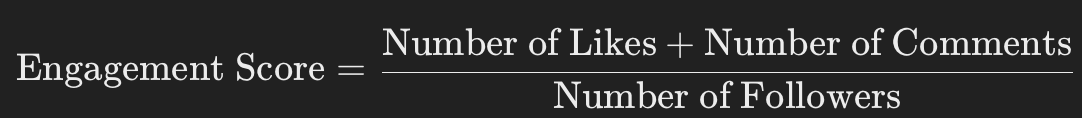
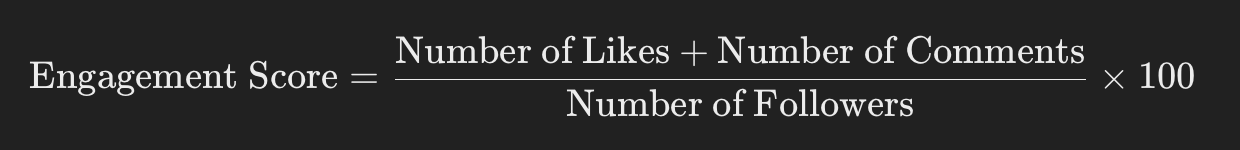

In [14]:
# Calculate the engagement score

IG_data['engagement_score']=((IG_data['number_of_likes'] + IG_data['number_of_comments']) / IG_data['number_of_followers'])
FB_data['engagement_score']=((FB_data['total_likes'] + FB_data['number_of_comments']) / FB_data['number_of_followers'])

# Ensure that the outcome is saved as float
FB_data['engagement_score'] = FB_data['engagement_score'].astype(float)
IG_data['engagement_score'] = IG_data['engagement_score'].astype(float)

# Display with the Engagement Score
print("\nDataFrame with Engagement Scores:\n")
display(FB_data,IG_data.head())


DataFrame with Engagement Scores:



,date,time,day,caption,profile,network,number_of_followers,number_of_likes,total_likes,number_of_comments,...,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links,contentpurpose,engagement_score
0,2021-12-31,18:00,Friday,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,...,0.305419,0.054187,0.004511,0.005444,91127584852_10160103901729853,91127584852,https://www.facebook.com/insomniacgames/photos...,<NA>,Informative,0.004419
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,FACEBOOK,1506484,850,1138,14,...,0.5,0.071429,0.000803,0.000888,57327290245_10165832084200246,57327290245,https://www.facebook.com/naughtydog/photos/a.1...,<NA>,Informative,0.000765
2,2021-12-31,16:00,Friday,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,...,0.458333,0.375,0.000183,0.00021,59916854460_10159833755834461,59916854460,https://www.facebook.com/SquareEnix/photos/a.1...,<NA>,Informative,0.000176
3,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,...,0.48,0.36,0.000460,0.000606,59916854460_10159832301434461,59916854460,https://www.facebook.com/867403448085191/video...,<NA>,Entertainment,0.000398
4,2021-12-31,13:00,Friday,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,...,0.565421,0.17757,0.019262,0.020235,283103815139159_4671320582984105,283103815139159,https://www.facebook.com/283103815139159/posts...,<NA>,Informative,0.018981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11817,2024-01-02,17:00,Tuesday,"The Rules of Valhalla: Preparation ""The chal...",Santa Monica Studio,FACEBOOK,0,644,922,29,...,0.310345,0.206897,0.006946,0.007412,404310782934653_888976556564295,404310782934653,https://www.facebook.com/739147731547179/posts...,<NA>,Informative,inf
11818,2024-01-02,16:00,Tuesday,Who's excited to take on new and familiar foes...,Square Enix,FACEBOOK,0,647,880,76,...,0.513158,0.184211,0.000932,0.00112,59916854460_982334366592098,59916854460,https://www.facebook.com/867403448085191/video...,<NA>,Social/Interactive,inf
11819,2024-01-02,15:00,Tuesday,what have you been playing over the holidays?,Ubisoft,FACEBOOK,0,306,381,926,...,0.316415,0.336933,0.000633,0.001092,81174647292_929205918563949,81174647292,https://www.facebook.com/820219539462588/posts...,<NA>,Informative,inf
11820,2024-01-02,13:00,Tuesday,Take caution when you're out in the wilds. ?...,Guerrilla Games,FACEBOOK,0,280,358,1,...,-,-,0.001844,0.001879,179751088724627_920688956093823,179751088724627,https://www.facebook.com/777512863744767/posts...,<NA>,Informative,inf


,date,time,day,caption,profile,network,number_of_followers,number_of_likes,number_of_comments,"reactions, comments & shares",number of posts,picture_posts,video_posts,engagement,message-id,profile-id,link,external links,contentpurpose,engagement_score
0,2021-12-31,18:00,Friday,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,8485,1,1,0,0.014204,18159887410207560,302534790,https://www.instagram.com/p/CYKA__hjRC2/,<NA>,Informative,0.014204
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,20027,1,1,0,0.016569,17918878019040680,1593309399,https://www.instagram.com/p/CYJzRfyAaSI/,<NA>,Informative,0.016569
2,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,3246,1,0,1,0.003063,17864704832649000,2117884847,https://www.instagram.com/tv/CYJlmkOhnw0/,<NA>,Entertainment,0.003063
3,2021-12-30,18:00,Thursday,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,42351,1,1,0,0.070946,17902246271425140,302534790,https://www.instagram.com/p/CYHcUnih3H8/,<NA>,Informative,0.070895
4,2021-12-30,15:00,Thursday,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,159037,1,1,0,0.007325,18189250981149360,184595688,https://www.instagram.com/p/CYHInoNtmzo/,<NA>,Informative,0.007322


##### Drop unnecessary columns

In [15]:
# Dropping the unnecessary columns
columns_to_drop_FB = [
    'number of comments (primary)','reactions, comments & shares', 
    'number of posts', 'post comments positive sentiment share', 'post comments negative sentiment share', 'engagement', 
    'weighted engagement', 'message-id', 'profile-id'
]

columns_to_drop_IG = [
    'reactions, comments & shares', 
    'number of posts', 'engagement', 
    'message-id', 'profile-id'
]

FB_data = FB_data.drop(columns=columns_to_drop_FB)
IG_data = IG_data.drop(columns=columns_to_drop_IG)

In [17]:
# Check the data after dropping the columns
display(FB_data,IG_data.head())

,date,time,day,caption,profile,network,number_of_followers,number_of_likes,total_likes,number_of_comments,...,number of love,number of angry,number of care,number of sad,number of thankful,number of wow,link,external links,contentpurpose,engagement_score
0,2021-12-31,18:00,Friday,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,...,264,0,0,0,0,1,https://www.facebook.com/insomniacgames/photos...,<NA>,Informative,0.004419
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,FACEBOOK,1506484,850,1138,14,...,284,1,0,0,0,2,https://www.facebook.com/naughtydog/photos/a.1...,<NA>,Informative,0.000765
2,2021-12-31,16:00,Friday,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,...,52,1,0,0,0,1,https://www.facebook.com/SquareEnix/photos/a.1...,<NA>,Informative,0.000176
3,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,...,184,4,0,0,0,1,https://www.facebook.com/867403448085191/video...,<NA>,Entertainment,0.000398
4,2021-12-31,13:00,Friday,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,...,2275,2,0,6,0,3,https://www.facebook.com/283103815139159/posts...,<NA>,Informative,0.018981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11817,2024-01-02,17:00,Tuesday,"The Rules of Valhalla: Preparation ""The chal...",Santa Monica Studio,FACEBOOK,0,644,922,29,...,276,0,0,0,0,2,https://www.facebook.com/739147731547179/posts...,<NA>,Informative,inf
11818,2024-01-02,16:00,Tuesday,Who's excited to take on new and familiar foes...,Square Enix,FACEBOOK,0,647,880,76,...,216,0,0,0,0,16,https://www.facebook.com/867403448085191/video...,<NA>,Social/Interactive,inf
11819,2024-01-02,15:00,Tuesday,what have you been playing over the holidays?,Ubisoft,FACEBOOK,0,306,381,926,...,68,3,0,1,0,1,https://www.facebook.com/820219539462588/posts...,<NA>,Informative,inf
11820,2024-01-02,13:00,Tuesday,Take caution when you're out in the wilds. ?...,Guerrilla Games,FACEBOOK,0,280,358,1,...,78,0,0,0,0,0,https://www.facebook.com/777512863744767/posts...,<NA>,Informative,inf


,date,time,day,caption,profile,network,number_of_followers,number_of_likes,number_of_comments,picture_posts,video_posts,link,external links,contentpurpose,engagement_score
0,2021-12-31,18:00,Friday,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,1,0,https://www.instagram.com/p/CYKA__hjRC2/,<NA>,Informative,0.014204
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,1,0,https://www.instagram.com/p/CYJzRfyAaSI/,<NA>,Informative,0.016569
2,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,0,1,https://www.instagram.com/tv/CYJlmkOhnw0/,<NA>,Entertainment,0.003063
3,2021-12-30,18:00,Thursday,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,1,0,https://www.instagram.com/p/CYHcUnih3H8/,<NA>,Informative,0.070895
4,2021-12-30,15:00,Thursday,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,1,0,https://www.instagram.com/p/CYHInoNtmzo/,<NA>,Informative,0.007322


In [16]:
# Count how often each category appears per profile
category_countsFB = FB_data.groupby(["profile", "contentpurpose"]).size().unstack(fill_value=0)
category_countsIG = IG_data.groupby(["profile", "contentpurpose"]).size().unstack(fill_value=0)

# Convert to percentages
category_percentagesFB = category_countsFB.div(category_countsFB.sum(axis=1), axis=0) * 100
category_percentagesIG = category_countsIG.div(category_countsIG.sum(axis=1), axis=0) * 100
category_percentagesFB = category_percentagesFB.round(2)
category_percentagesIG = category_percentagesIG.round(2)

# Show results
display(category_percentagesFB)
display(category_percentagesIG)

contentpurpose,Entertainment,Informative,Promotion,Reward-Based,Social/Interactive,Unknown
profile,,,,,,
Bethesda,14.32,43.88,4.85,2.08,20.09,14.78
CD PROJEKT RED,8.71,64.92,7.19,1.53,11.55,6.10
Electronic Arts (EA),13.50,31.00,2.75,0.50,14.00,38.25
Guerrilla Games,8.37,35.46,2.16,0.63,49.40,3.98
Insomniac Games,12.97,54.19,7.26,1.33,22.54,1.70
Naughty Dog,17.47,34.05,3.04,0.20,36.90,8.34
Obsidian Entertainment,20.00,48.15,2.59,0.74,17.41,11.11
Rockstar Games,10.06,38.92,2.54,30.89,11.89,5.69
Santa Monica Studio,5.88,77.88,1.41,1.18,8.71,4.94


contentpurpose,Entertainment,Informative,Promotion,Reward-Based,Social/Interactive,Unknown
profile,,,,,,
Bethesda,10.39,52.36,5.77,3.04,28.02,0.42
CD PROJEKT RED,7.98,61.03,7.51,2.35,20.19,0.94
Electronic Arts (EA),17.87,45.77,5.64,1.57,28.53,0.63
Guerrilla Games,9.49,35.53,2.76,0.77,51.45,0.00
Insomniac Games,13.95,53.45,8.49,1.52,22.29,0.30
Naughty Dog,14.37,40.07,4.91,0.47,39.72,0.47
Obsidian Entertainment,30.67,49.33,0.67,0.67,18.67,0.00
Rockstar Games,6.95,58.32,1.87,26.90,5.84,0.11
Santa Monica Studio,7.84,76.47,2.16,1.37,11.18,0.98


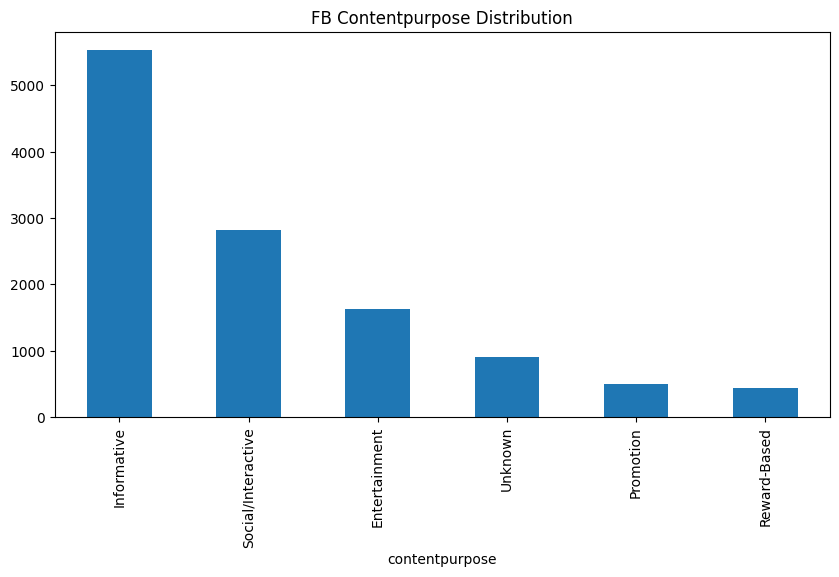

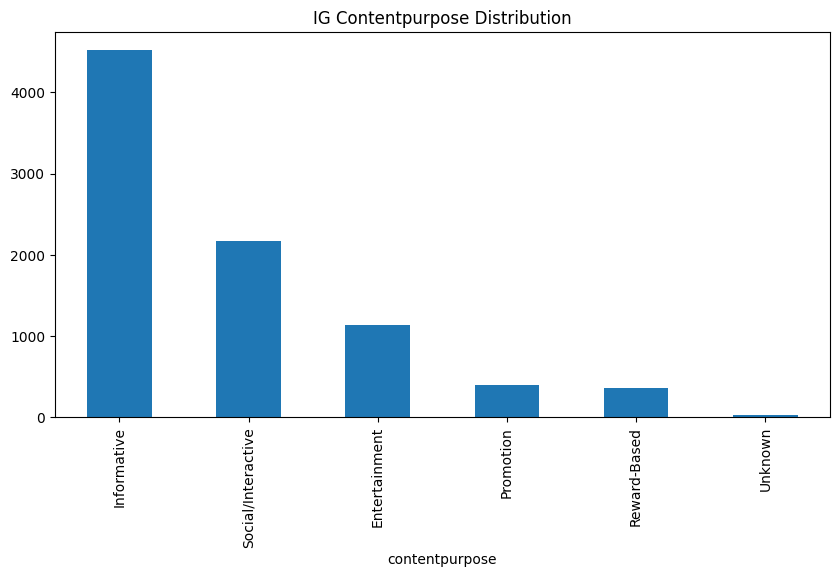

In [19]:
# FB_data contentpurpose distribution
FB_data["contentpurpose"].value_counts().plot(kind='bar', figsize=(10, 5), title="FB Contentpurpose Distribution")
plt.show()

# IG_data contentpurpose distributie
IG_data["contentpurpose"].value_counts().plot(kind='bar', figsize=(10, 5), title="IG Contentpurpose Distribution")
plt.show()


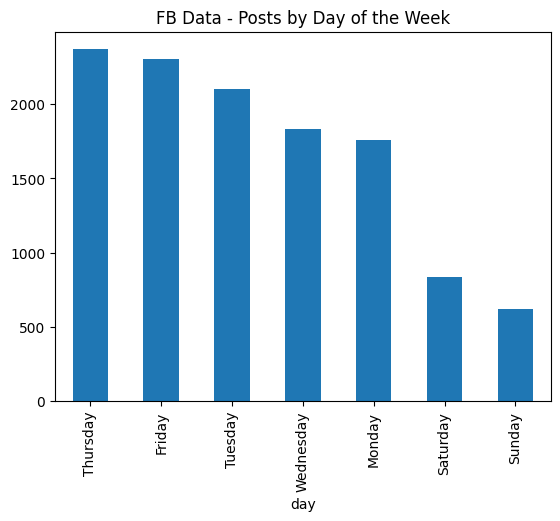

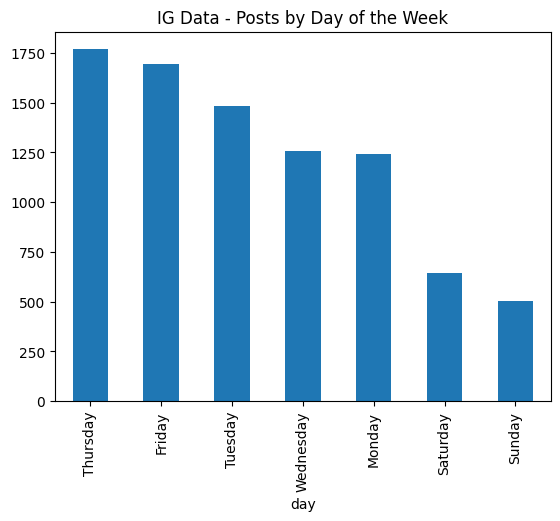

In [20]:
# Day of the week distribution
FB_data["day"].value_counts().plot(kind='bar', title="FB Data - Posts by Day of the Week")
plt.show()

IG_data["day"].value_counts().plot(kind='bar', title="IG Data - Posts by Day of the Week")
plt.show()


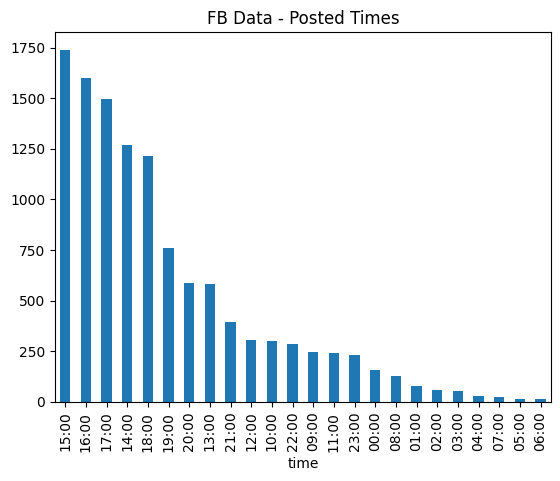

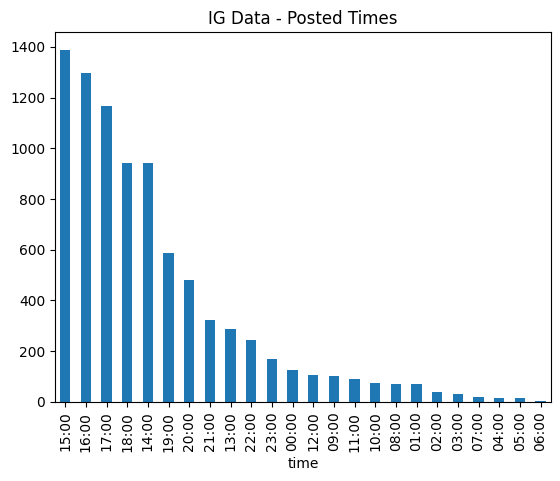

In [21]:
# Time of the day distribution
FB_data["time"].value_counts().plot(kind='bar', title="FB Data - Posted Times")
plt.show()

IG_data["time"].value_counts().plot(kind='bar', title="IG Data - Posted Times")
plt.show()

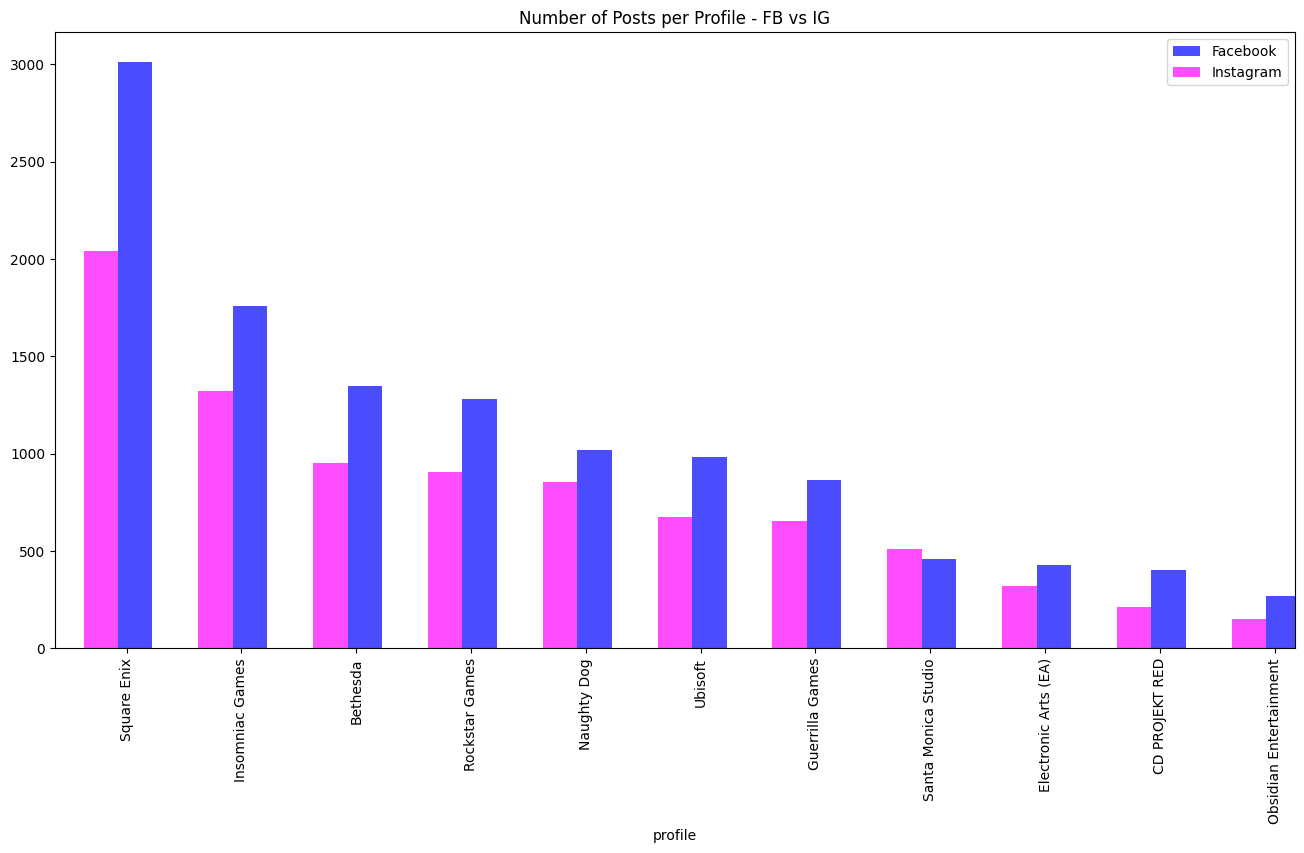

In [22]:
# Number of posts per profile by platform
FB_profiles = FB_data["profile"].value_counts()
IG_profiles = IG_data["profile"].value_counts()

# Graphic Compare
plt.figure(figsize=(16, 8))
FB_profiles.plot(kind='bar', alpha=0.7, color='blue', label='Facebook', width=0.3, position=0.25)
IG_profiles.plot(kind='bar', alpha=0.7, color='fuchsia', label='Instagram', width=0.3, position=1.25)
plt.title("Number of Posts per Profile - FB vs IG")
plt.legend()
plt.show()


## Sub-Question 5: "What specific days and times result in the highest level of customer engagement on Facebook and Instagram?" <br>
### Hypothesis:
5.1:
- H0): The day of posting on social media have no significant impact on customer engagement levels. 
- Ha): The day of posting on social media has a significant impact on customer engagement levels. <br>

5.2:<br>
- H0): The time of posting on social media have no significant impact on customer engagement levels. 
- Ha): The time of posting on social media has a significant impact on customer engagement levels. 

To determine which test we are going to use for hypothesis 5.1 (Day of the week) we are going to check whether the data is normally distributed or not.<br><br>
We will use the kolmogorov-Smirnov Test and a Q-Q plot to see if the data is normal distributed or not.
- Test statistic: The KS test calculates the maximum distance between the empirical distribution of the data and the theoretical distribution.
- P-value: The p-value indicates the probability that your data matches the theoretical distribution. The smaller the p-value, the more evidence there is to reject the null hypothesis.
    - Null Hypothesis (H0): De data is normal distributed.
    - Alternative Hypothesis (Ha): De data is not normal distributed.
The Q-Q plot (Quantile-Quantile plot) visually shows how the distribution of the data compares to a theoretical normal distribution:<br>
If the points lie on a straight line, the data is normally distributed.<Br>
Deviations from the line indicate a non-normal distribution.<BR>
<BR>
- If the data is normally distributed by day, then we will use an ANOVA.
- If the data per day is not normally distributed, then we will use a Kruskal-Wallis Test.


Kolmogorov-Smirnov Test results for Friday:
KS-statistic: 0.5
P-value: 0.0
The data for Friday is not normal distributed.


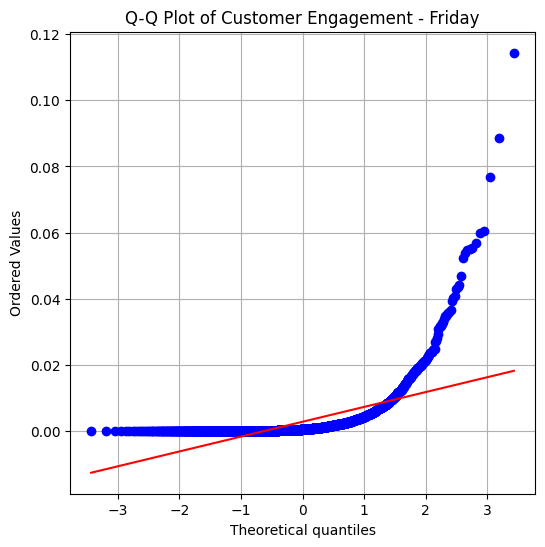


Kolmogorov-Smirnov Test results for Thursday:
KS-statistic: 0.5
P-value: 0.0
The data for Thursday is not normal distributed.


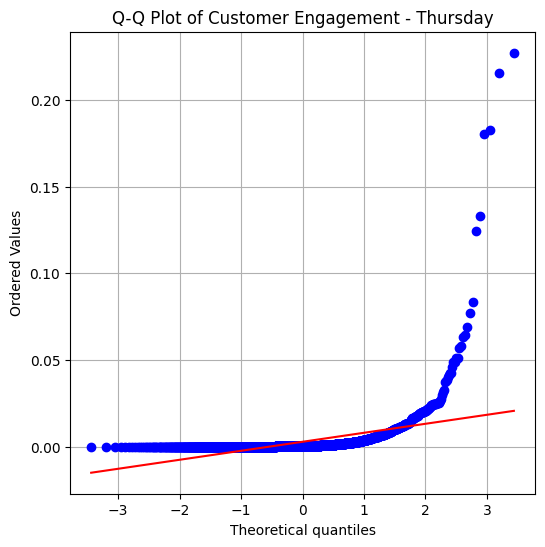


Kolmogorov-Smirnov Test results for Wednesday:
KS-statistic: 0.5
P-value: 0.0
The data for Wednesday is not normal distributed.


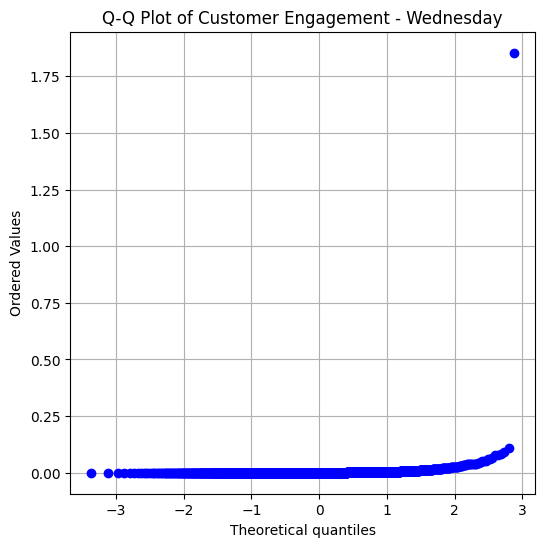


Kolmogorov-Smirnov Test results for Tuesday:
KS-statistic: 0.5
P-value: 0.0
The data for Tuesday is not normal distributed.


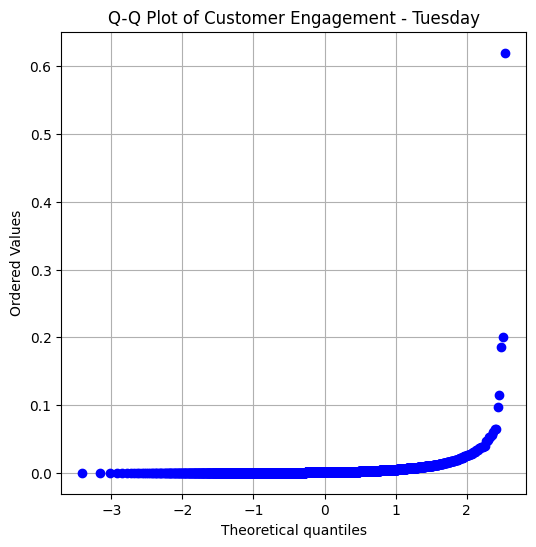


Kolmogorov-Smirnov Test results for Monday:
KS-statistic: 0.5
P-value: 0.0
The data for Monday is not normal distributed.


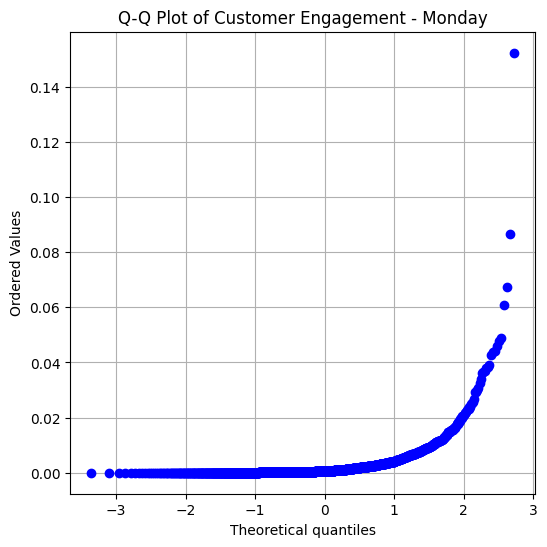


Kolmogorov-Smirnov Test results for Sunday:
KS-statistic: 0.5000003565957505
P-value: 2.1648491518935748e-143
The data for Sunday is not normal distributed.


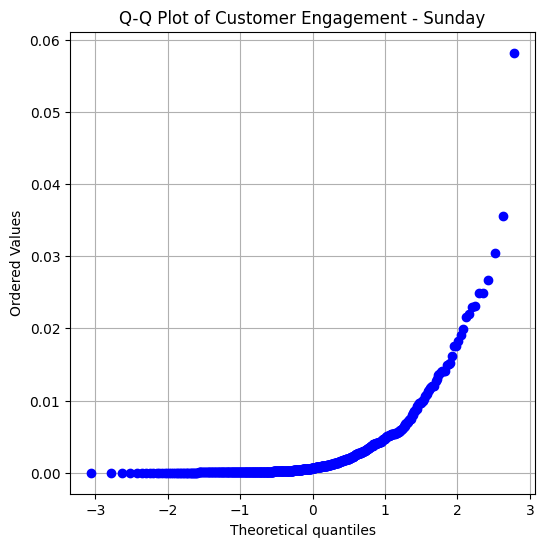


Kolmogorov-Smirnov Test results for Saturday:
KS-statistic: 0.5000001404328529
P-value: 5.109849807444757e-194
The data for Saturday is not normal distributed.


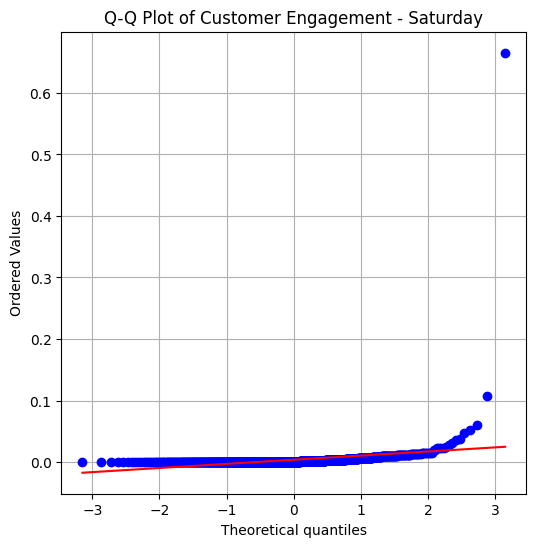

In [18]:
# Ensuring that day is category
FB_data['day'] = FB_data['day'].astype('category')

# List of unique days
unique_daysFB = FB_data['day'].unique()

# Test for every day seperately 
for day in unique_daysFB:
    day_data = FB_data[FB_data['day'] == day]['engagement_score']

    # Perform the Kolmogorov-Smirnov test against a normal distribution
    ks_stat, ks_p_value = stats.kstest(day_data, 'norm')

    # Print the results
    print(f"\nKolmogorov-Smirnov Test results for {day}:")
    print("KS-statistic:", ks_stat)
    print("P-value:", ks_p_value)

    if ks_p_value > 0.05:
        print(f"The data for {day} is normal distributed.")
    else:
        print(f"The data for {day} is not normal distributed.")

    # Create a Q-Q plot
    plt.figure(figsize=(6, 6))
    stats.probplot(day_data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Customer Engagement - {day}")
    plt.grid(True)
    plt.show()



Kolmogorov-Smirnov Test results for Friday:
KS-statistic: 0.5000030111834127
P-value: 0.0
The data for Friday is not normal distributed.


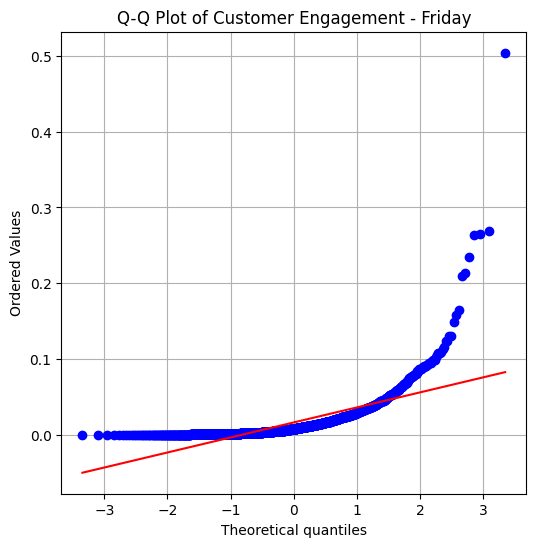


Kolmogorov-Smirnov Test results for Thursday:
KS-statistic: 0.5
P-value: 0.0
The data for Thursday is not normal distributed.


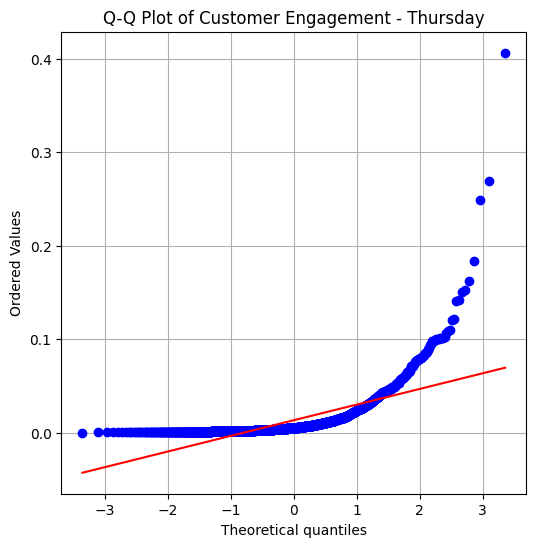


Kolmogorov-Smirnov Test results for Wednesday:
KS-statistic: 0.500002192522738
P-value: 1.4136380251078126e-291
The data for Wednesday is not normal distributed.


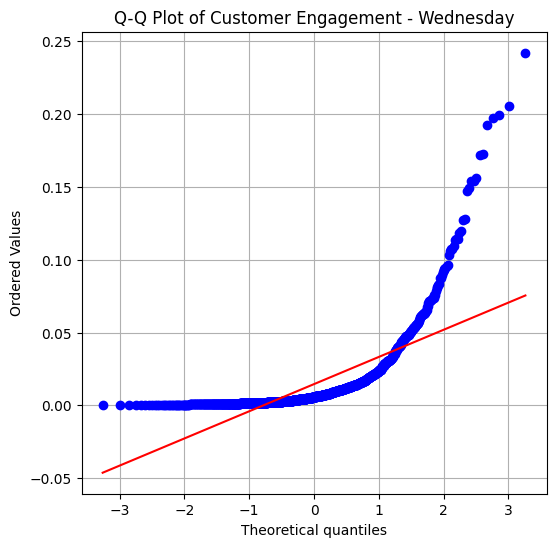


Kolmogorov-Smirnov Test results for Tuesday:
KS-statistic: 0.5000024762141391
P-value: 0.0
The data for Tuesday is not normal distributed.


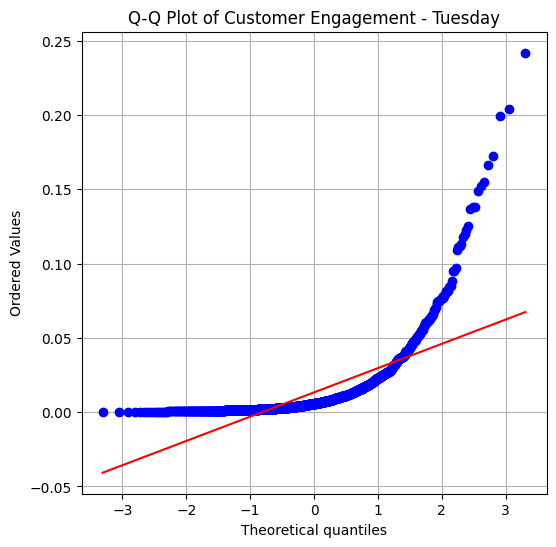


Kolmogorov-Smirnov Test results for Monday:
KS-statistic: 0.500054780816551
P-value: 3.5741839774500744e-288
The data for Monday is not normal distributed.


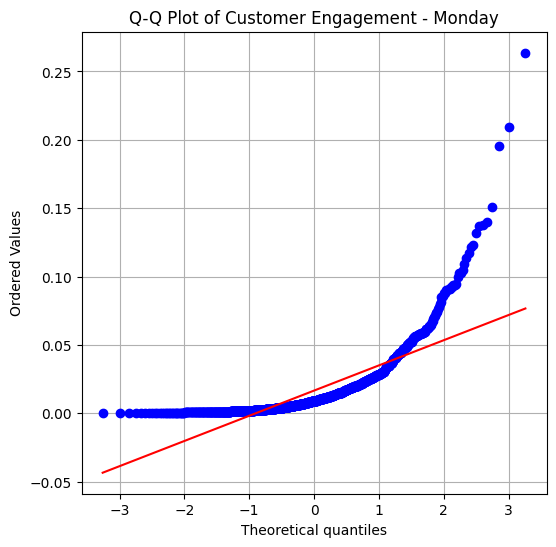


Kolmogorov-Smirnov Test results for Sunday:
KS-statistic: 0.5000110213473133
P-value: 8.225722941394277e-117
The data for Sunday is not normal distributed.


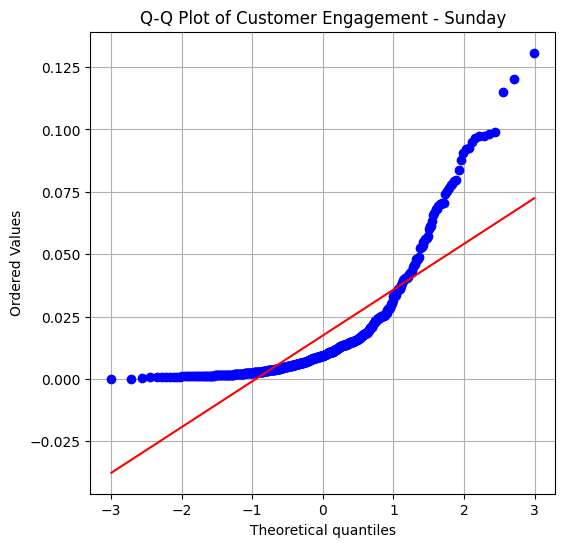


Kolmogorov-Smirnov Test results for Saturday:
KS-statistic: 0.5000093283407914
P-value: 1.2245755574186265e-149
The data for Saturday is not normal distributed.


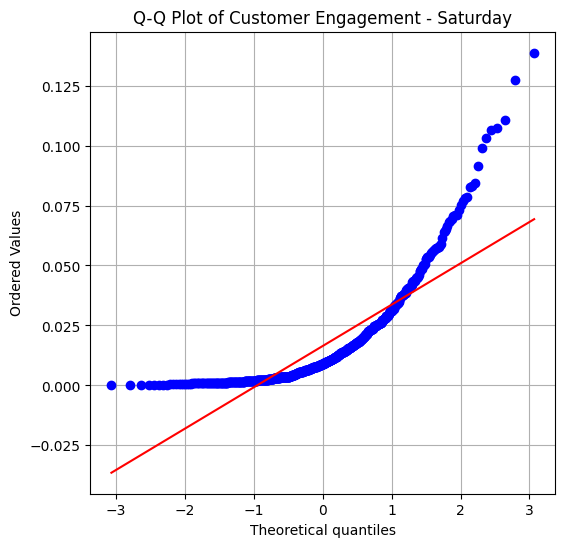

In [21]:
# Ensuring that day is category
IG_data['day'] = IG_data['day'].astype('category')

# List of unique days
unique_daysIG = IG_data['day'].unique()

# Test for every day seperately 
for day in unique_daysIG:
    day_dataIG = IG_data[IG_data['day'] == day]['engagement_score']

    # Perform the Kolmogorov-Smirnov test against a normal distribution
    ks_statIG, ks_p_valueIG = stats.kstest(day_dataIG, 'norm')

    # Print the results
    print(f"\nKolmogorov-Smirnov Test results for {day}:")
    print("KS-statistic:", ks_statIG)
    print("P-value:", ks_p_valueIG)

    if ks_p_valueIG > 0.05:
        print(f"The data for {day} is normal distributed.")
    else:
        print(f"The data for {day} is not normal distributed.")

    # Create a Q-Q plot
    plt.figure(figsize=(6, 6))
    stats.probplot(day_dataIG, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Customer Engagement - {day}")
    plt.grid(True)
    plt.show()

In [22]:
# Create lists of customer engagement by platform per day
fb_day_groups = [FB_data[FB_data['day'] == day]['engagement_score'] for day in unique_daysFB]
ig_day_groups = [IG_data[IG_data['day'] == day]['engagement_score'] for day in unique_daysIG]

# Perform Kruskal-Wallis Test for Facebook
print("Kruskal-Wallis Test for Facebook")
kruskal_test_fb = kruskal(*fb_day_groups)
print(f"Facebook Kruskal-Wallis statistic: {float(kruskal_test_fb.statistic)}")
print(f"Facebook p-value: {float(kruskal_test_fb.pvalue)}\n")


# Perform Kruskal-Wallis Test for Instagram
print("\nKruskal-Wallis Test for Instagram")
kruskal_test_ig = kruskal(*ig_day_groups)
print(f"Instagram Kruskal-Wallis statistic: {float(kruskal_test_ig.statistic)}")
print(f"Instagram p-value: {float(kruskal_test_ig.pvalue)}\n")


# Decide whether to reject or accept H0 for Facebook
alpha = 0.05  # significance level
if kruskal_test_fb.pvalue < alpha:
    print("We reject H0: The day of posting on Facebook has a significant impact on customer engagement levels.\n")
else:
    print("We fail to reject H0: The day of posting on Facebook has no significant impact on customer engagement levels.\n")

# Decide whether to reject or accept H0 for Instagram
if kruskal_test_ig.pvalue < alpha:
    print("We reject H0: The day of posting on Instagram has a significant impact on customer engagement levels.\n")
else:
    print("We fail to reject H0: The day of posting on Instagram has no significant impact on customer engagement levels.\n")


Kruskal-Wallis Test for Facebook
Facebook Kruskal-Wallis statistic: 89.35674706608567
Facebook p-value: 4.121243502875559e-17


Kruskal-Wallis Test for Instagram
Instagram Kruskal-Wallis statistic: 155.05487094024218
Instagram p-value: 6.596990131486736e-31

We reject H0: The day of posting on Facebook has a significant impact on customer engagement levels.

We reject H0: The day of posting on Instagram has a significant impact on customer engagement levels.



##### Results
The Kruskal-Wallis Test was conducted to examine whether there is a significant difference in customer engagement between different days of the week for both Facebook and Instagram.<Br>
Since the normality check previously showed that the data is not normally distributed, we chose this test.<br><Br>
The p-values of both Facebook and Instagram are extremely small (<< 0.05), meaning that there is a significant difference between the days that content is posted with relating to customer engagement.<Br>
In other words:<Br>
- The day on which content is posted has a significant impact on the level of engagement on both platforms.
- So we can reject H0 and accept Ha.
- However, the Kruskal-Wallis Test only indicates that there is a difference, but not between which specific days there is this difference.<br><br>

To find out between which days the difference actually lies, we perform a Dunn's Test.<br>
The Dunn's Test is a Post-Hoc Analysis used specifically after a significant Kruskal-Wallis Test. This test makes pairwise comparisons between the days to determine which days are significantly different from each other in terms of Customer Engagement.


Dunn’s Test for Facebook


,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Friday,1.000000,1.000000e+00,1.567761e-02,1.000000,9.971188e-03,1.000000e+00,9.999943e-05
Monday,1.000000,1.000000e+00,5.950483e-01,1.000000,7.040343e-05,1.000000e+00,4.263919e-07
Saturday,0.015678,5.950483e-01,1.000000e+00,1.000000,6.508699e-08,9.582114e-01,4.579164e-10
Sunday,1.000000,1.000000e+00,1.000000e+00,1.000000,1.282880e-03,1.000000e+00,3.817456e-05
Thursday,0.009971,7.040343e-05,6.508699e-08,0.001283,1.000000e+00,3.682226e-06,1.000000e+00
Tuesday,1.000000,1.000000e+00,9.582114e-01,1.000000,3.682226e-06,1.000000e+00,1.360197e-08
Wednesday,0.000100,4.263919e-07,4.579164e-10,0.000038,1.000000e+00,1.360197e-08,1.000000e+00



Dunn’s Test for Instagram


,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Friday,1.000000e+00,1.000000e+00,1.000000e+00,1.409199e-01,3.357052e-12,1.390275e-06,2.810124e-06
Monday,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.105151e-14,7.484698e-09,1.777648e-08
Saturday,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.034121e-10,8.425982e-07,1.159778e-06
Sunday,1.409199e-01,1.000000e+00,1.000000e+00,1.000000e+00,3.108391e-13,3.458678e-09,5.134836e-09
Thursday,3.357052e-12,1.105151e-14,1.034121e-10,3.108391e-13,1.000000e+00,1.000000e+00,1.000000e+00
Tuesday,1.390275e-06,7.484698e-09,8.425982e-07,3.458678e-09,1.000000e+00,1.000000e+00,1.000000e+00
Wednesday,2.810124e-06,1.777648e-08,1.159778e-06,5.134836e-09,1.000000e+00,1.000000e+00,1.000000e+00


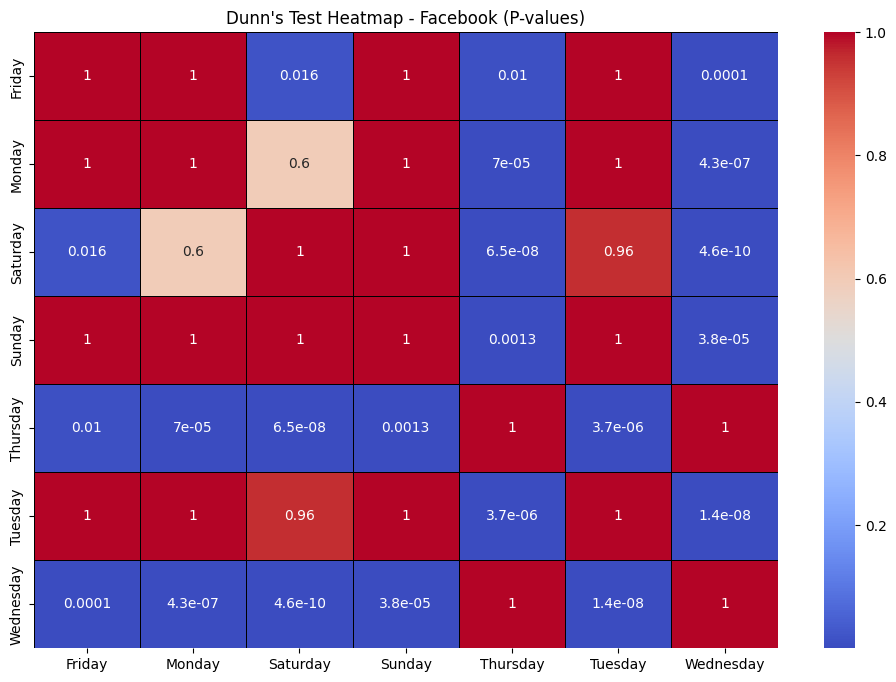

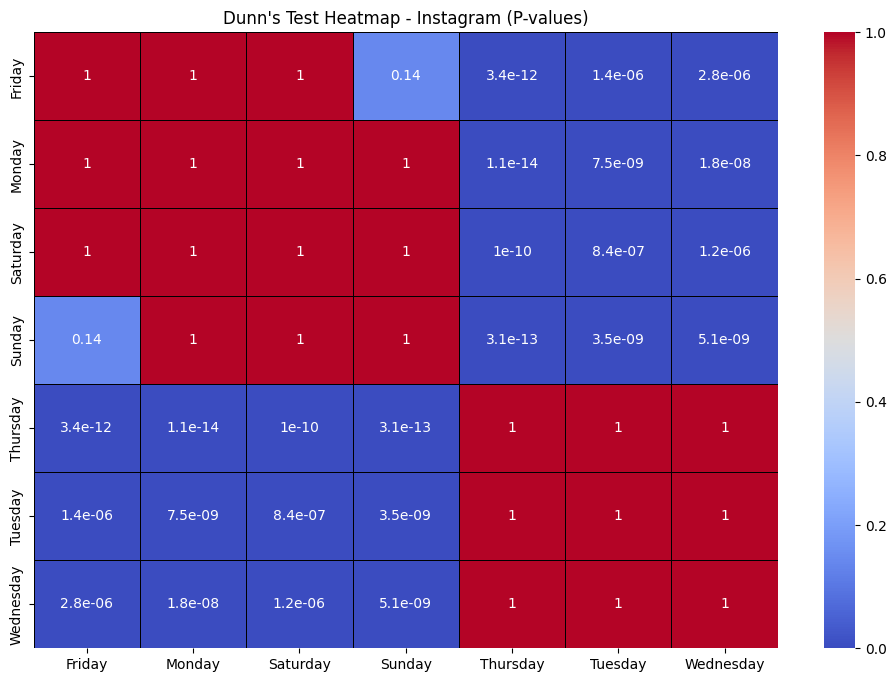

In [23]:
# Facebook Dunn’s Test
print("\nDunn’s Test for Facebook")
dunn_test_fb = sp.posthoc_dunn(FB_data, val_col='engagement_score', group_col='day', p_adjust='bonferroni')
display(dunn_test_fb)

# Instagram Dunn’s Test
print("\nDunn’s Test for Instagram")
dunn_test_ig = sp.posthoc_dunn(IG_data, val_col='engagement_score', group_col='day', p_adjust='bonferroni')
display(dunn_test_ig)

# Heatmap for Facebook
plt.figure(figsize=(12, 8))
sns.heatmap(dunn_test_fb, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title("Dunn's Test Heatmap - Facebook (P-values)")
plt.show()

# Heatmap for Instagram
plt.figure(figsize=(12, 8))
sns.heatmap(dunn_test_ig, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title("Dunn's Test Heatmap - Instagram (P-values)")
plt.show()

##### Results
The Dunn's Test was conducted to determine between which days there are significant differences in customer engagement on both Facebook and Instagram. This is a Post-Hoc Analysis after conducting the Kruskal-Wallis Test, which had already determined that there is a significant difference between days of the week.<br><br>
Heatmap:<br>
The heatmaps shows the p-values of the Dunn's Test for Facebook and Instagram.<Br>
- Blue cells: Significant differences (p-values < 0.05).<Br>
- Red cells: No significant differences (p-values ≥ 0.05).<Br>
- Dark blues: Very strong significant differences.<Br><Br>

Interpreting the Results:<br><br>
- Thursday stands out strongly as a day with different engagement numbers, especially on Facebook.
- Instagram has strong differences between Thursday, Tuesday, and Wednesday, indicating that a different strategy may be needed on these days.
- Blue cells are the days where action should be taken to improve engagement.<br><br><Br>


Facebook - Engagement Scores per Dag (Totaal / Aantal Posts):
day
Friday       0.002849
Monday       0.000000
Saturday     0.003832
Sunday       0.000000
Thursday     0.002883
Tuesday      0.000000
Wednesday    0.000000
Name: engagement_score, dtype: float64

Instagram - Engagement Scores per Dag (Totaal / Aantal Posts):
day
Friday       0.016756
Monday       0.016600
Saturday     0.016450
Sunday       0.017405
Thursday     0.013154
Tuesday      0.013300
Wednesday    0.014578
Name: engagement_score, dtype: float64


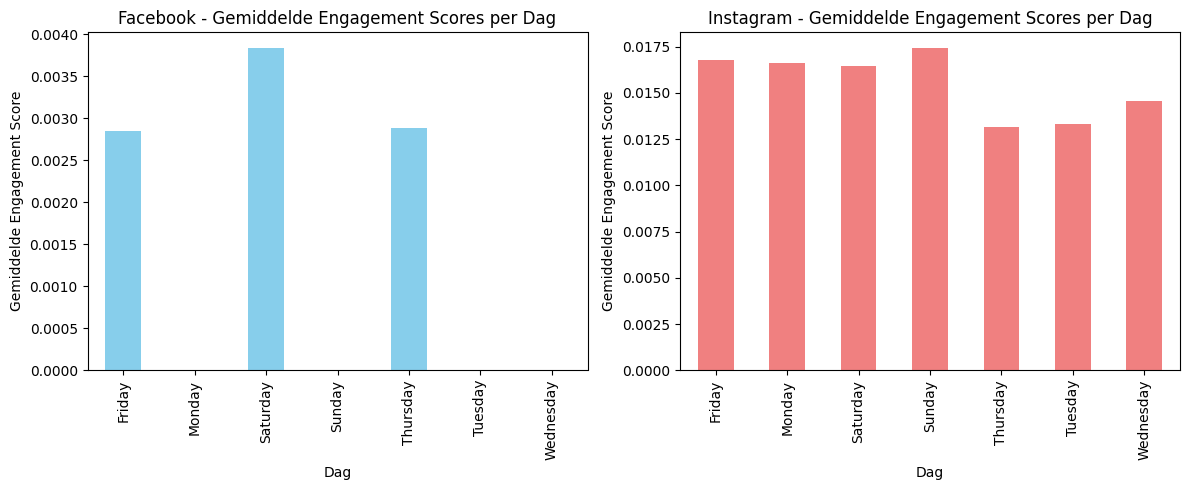

In [51]:
# Bereken de totale engagement score en het aantal posts per dag (Facebook)
fb_total_engagement = FB_data.groupby('day')['engagement_score'].sum()
fb_post_count = FB_data.groupby('day')['engagement_score'].count()

# Controleer of er geen posten zijn op een dag om 'inf' te voorkomen
fb_mean_scores = fb_total_engagement / fb_post_count
fb_mean_scores = fb_mean_scores.replace([float('inf'), -float('inf')], 0)

# Bereken de totale engagement score en het aantal posts per dag (Instagram)
ig_total_engagement = IG_data.groupby('day')['engagement_score'].sum()
ig_post_count = IG_data.groupby('day')['engagement_score'].count()

# Controleer of er geen posten zijn op een dag om 'inf' te voorkomen
ig_mean_scores = ig_total_engagement / ig_post_count
ig_mean_scores = ig_mean_scores.replace([float('inf'), -float('inf')], 0)

# Print de resultaten om te controleren
print("\nFacebook - Engagement Scores per Dag (Totaal / Aantal Posts):")
print(fb_mean_scores)

print("\nInstagram - Engagement Scores per Dag (Totaal / Aantal Posts):")
print(ig_mean_scores)

plt.figure(figsize=(12, 5))

# Facebook Plot
plt.subplot(1, 2, 1)
fb_mean_scores.plot(kind='bar', color='skyblue')
plt.title('Facebook - Gemiddelde Engagement Scores per Dag')
plt.xlabel('Dag')
plt.ylabel('Gemiddelde Engagement Score')

# Instagram Plot
plt.subplot(1, 2, 2)
ig_mean_scores.plot(kind='bar', color='lightcoral')
plt.title('Instagram - Gemiddelde Engagement Scores per Dag')
plt.xlabel('Dag')
plt.ylabel('Gemiddelde Engagement Score')

plt.tight_layout()
plt.show()

To determine which test we need for hypothesis 5.2 (Time of posting), we need to check again how this data is distributed.<br>
We will check this with the Kolmogorov-Smirnov test.<br>
As the same with the hypothesis of the day of posting we will use Anova if the data is normal distributed and Kruskal-Willis if the data is not normal distributed.


Kolmogorov-Smirnov Test results for 18:00:
KS-statistic: 0.5
P-value: 7.284213802434757e-282
The data for 18:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 16:00:
KS-statistic: 0.5
P-value: 0.0
The data for 16:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 14:00:
KS-statistic: 0.5
P-value: 4.07528389029212e-294
The data for 14:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 13:00:
KS-statistic: 0.5000000579204634
P-value: 1.5686685938688744e-135
The data for 13:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 15:00:
KS-statistic: 0.5000000713191501
P-value: 0.0
The data for 15:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 19:00:
KS-statistic: 0.5000007603220211
P-value: 1.1117459787734477e-176
The data for 19:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 02:00:
KS-statistic: 0.5000013341121023
P-value: 2.1423123072561207e-14
The data for 02:00 is not norma

/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2888: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


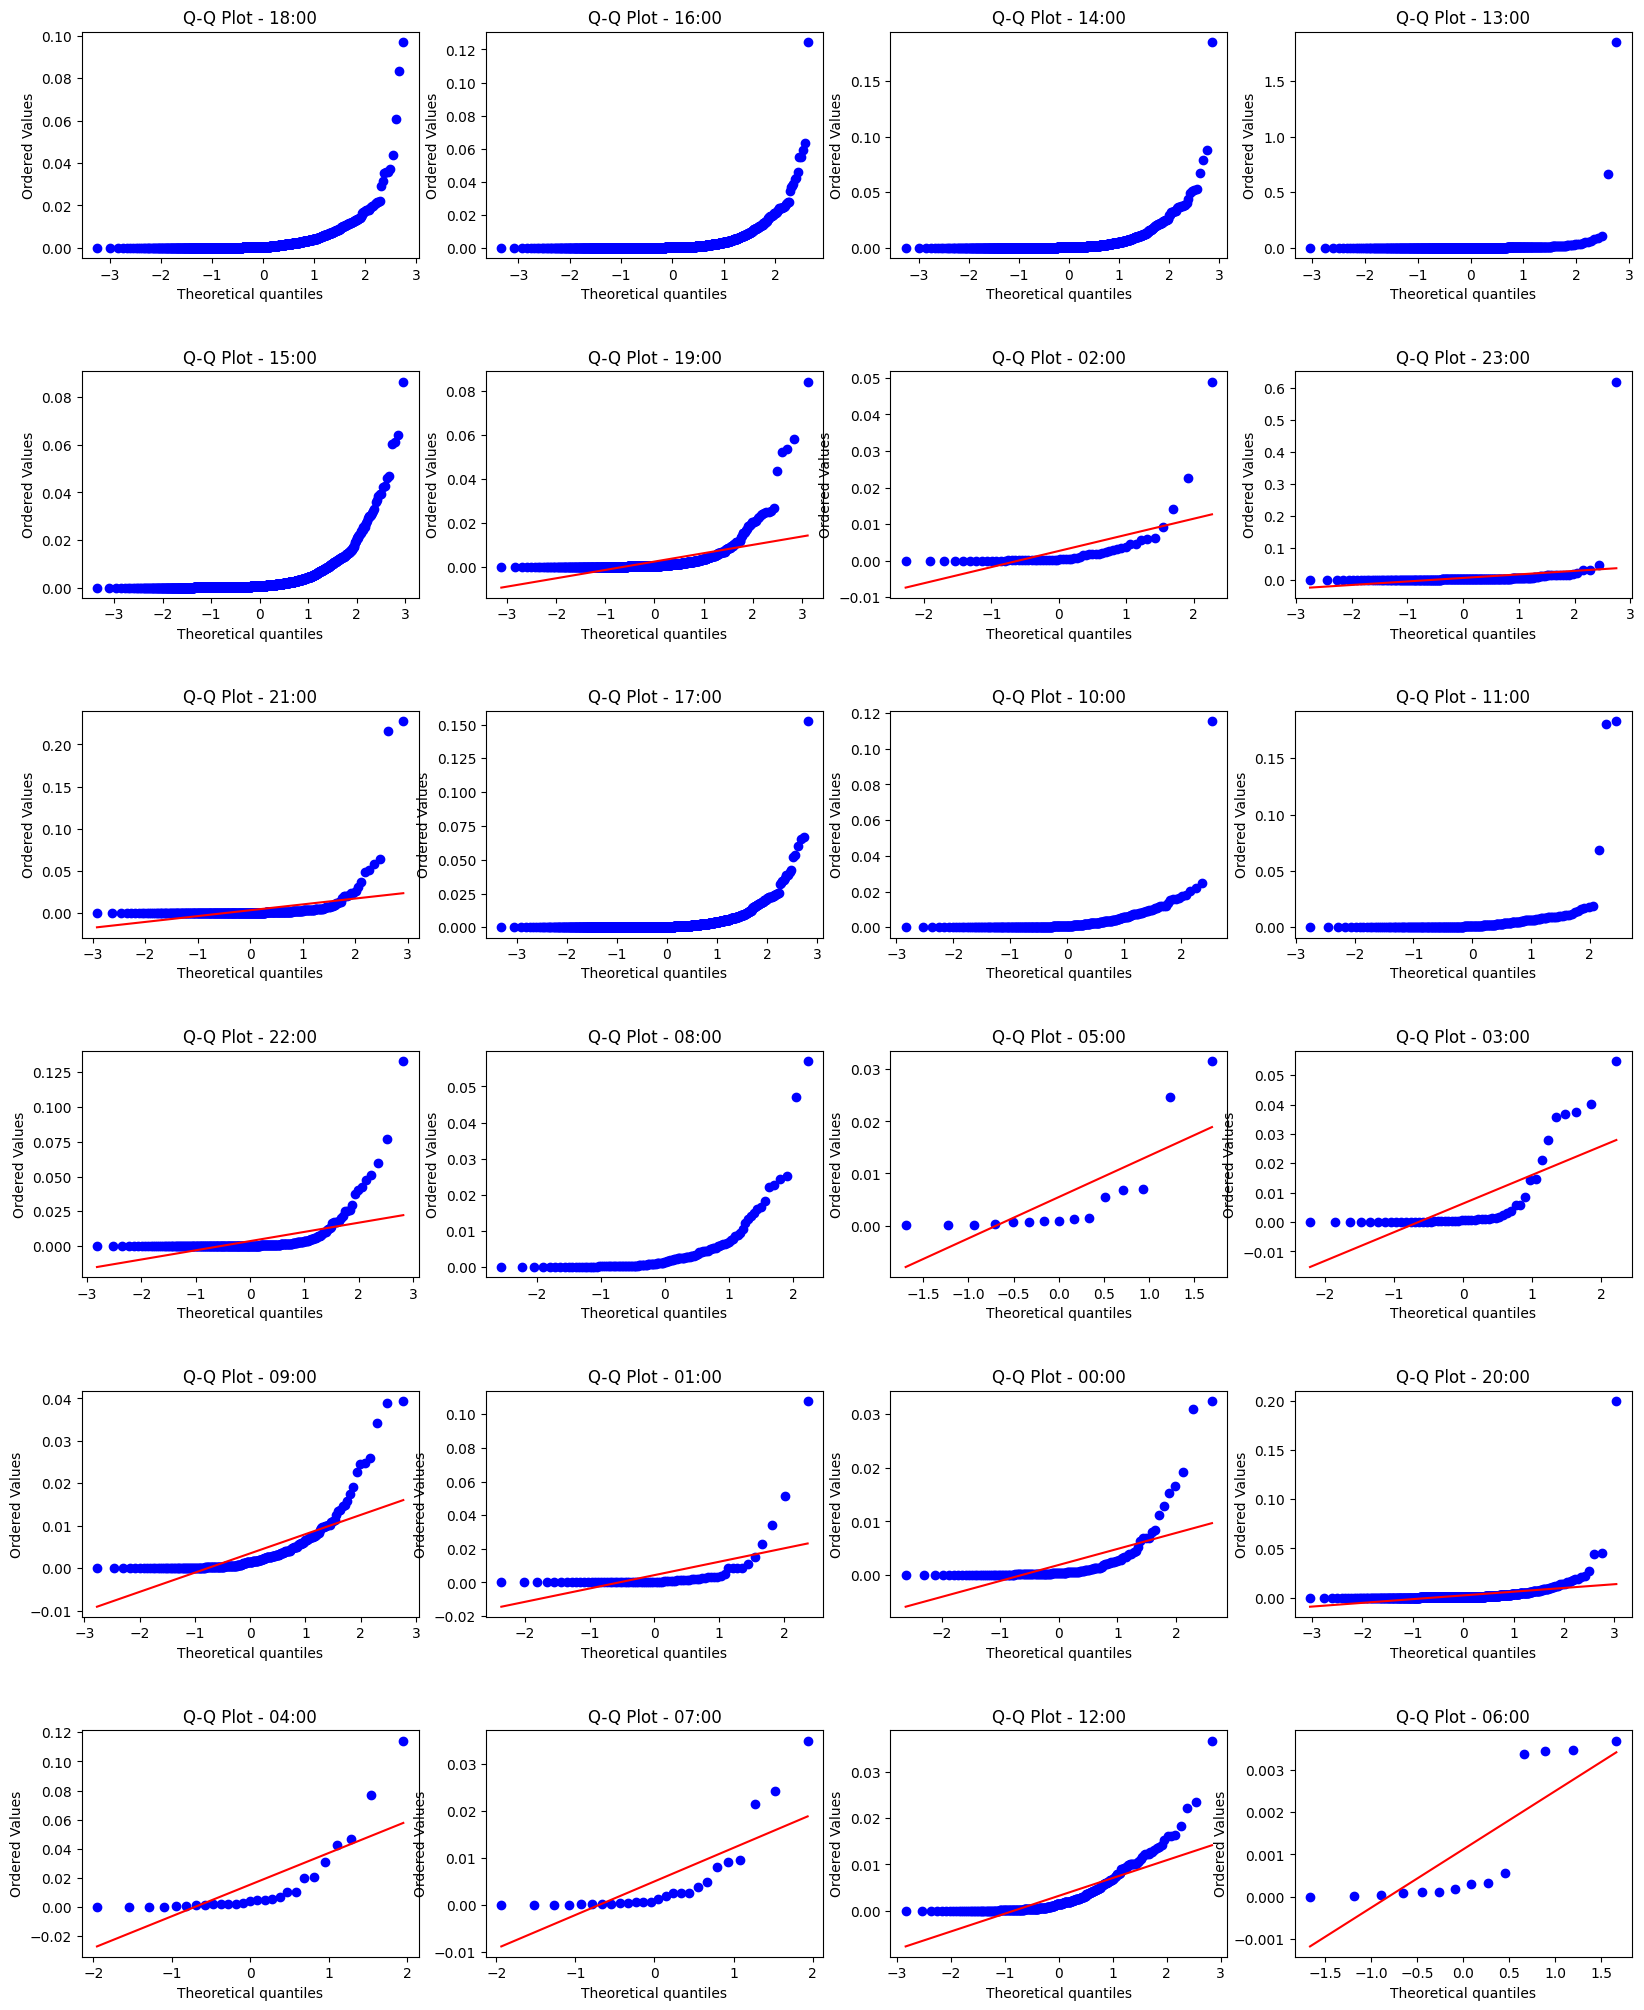


Table of KS test results per timestamp:
     Time  KS-statistic        P-value   Normality
0   18:00      0.500000  7.284214e-282  Not Normal
1   16:00      0.500000   0.000000e+00  Not Normal
2   14:00      0.500000  4.075284e-294  Not Normal
3   13:00      0.500000  1.568669e-135  Not Normal
4   15:00      0.500000   0.000000e+00  Not Normal
5   19:00      0.500001  1.111746e-176  Not Normal
6   02:00      0.500001   2.142312e-14  Not Normal
7   23:00      0.500001   2.174965e-54  Not Normal
8   21:00      0.500000   1.314148e-91  Not Normal
9   17:00      0.500000   0.000000e+00  Not Normal
10  10:00      0.500000   2.435341e-70  Not Normal
11  11:00      0.500001   8.920301e-56  Not Normal
12  22:00      0.500001   4.195703e-67  Not Normal
13  08:00      0.500000   1.408157e-30  Not Normal
14  05:00      0.500014   5.423107e-04  Not Normal
15  03:00      0.500003   1.514386e-12  Not Normal
16  09:00      0.500000   1.262500e-57  Not Normal
17  01:00      0.500003   4.284883e-18  N

In [33]:
# Controleer of de 'post_time' kolom aanwezig is en correct geformatteerd
FB_data['time'] = FB_data['time'].astype('category')

# Lijst van unieke tijdstippen
unique_timesFB = FB_data['time'].unique()

# Maak een lijst om de KS-statistieken, p-waarden en normaliteit op te slaan
ks_results = []

# Maak een figure voor de subplots (6 rijen en 4 kolommen)
fig, axes = plt.subplots(6, 4, figsize=(20, 25))
fig.subplots_adjust(hspace=0.5)

# Loop door elk tijdstip
for i, time in enumerate(unique_timesFB):
    row = i // 4  # Bepaal de rij voor het subplot
    col = i % 4  # Bepaal de kolom voor het subplot
    
    # Haal de engagement scores voor het specifieke tijdstip
    time_dataFB = FB_data[FB_data['time'] == time]['engagement_score']
    
    # Voer de Kolmogorov-Smirnov test uit tegen de normale verdeling
    ks_stat, ks_p_value = stats.kstest(time_dataFB, 'norm')

    # Voeg de resultaten toe aan de lijst
    normality_status = "Normal" if ks_p_value > 0.05 else "Not Normal"
    ks_results.append([time, ks_stat, ks_p_value, normality_status])
    
    # Print de resultaten in de console
    print(f"\nKolmogorov-Smirnov Test results for {time}:")
    print("KS-statistic:", ks_stat)
    print("P-value:", ks_p_value)

    if ks_p_value > 0.05:
        print(f"The data for {time} is normally distributed.")
    else:
        print(f"The data for {time} is not normally distributed.")

    # Maak een Q-Q plot voor visuele inspectie
    stats.probplot(time_dataFB, dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f"Q-Q Plot - {time}")

# Toon de plots
plt.show()

# Maak de resultaten in een tabel zichtbaar
ks_results_df = pd.DataFrame(ks_results, columns=["Time", "KS-statistic", "P-value", "Normality"])

# Print de tabel met KS-testresultaten
print("\nTable of KS test results per timestamp:")
print(ks_results_df)



Kolmogorov-Smirnov Test results for 18:00:
KS-statistic: 0.5
P-value: 2.724257291003746e-218
The data for 18:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 16:00:
KS-statistic: 0.500042627043909
P-value: 1.2091382939514389e-300
The data for 16:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 14:00:
KS-statistic: 0.5000583721681385
P-value: 2.4031293277138866e-218
The data for 14:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 15:00:
KS-statistic: 0.5001053105060679
P-value: 1.53e-321
The data for 15:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 02:00:
KS-statistic: 0.5001279401481661
P-value: 8.901672348483591e-10
The data for 02:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 13:00:
KS-statistic: 0.5000024762141391
P-value: 4.191781850289824e-67
The data for 13:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 21:00:
KS-statistic: 0.5000317558604973
P-value: 9

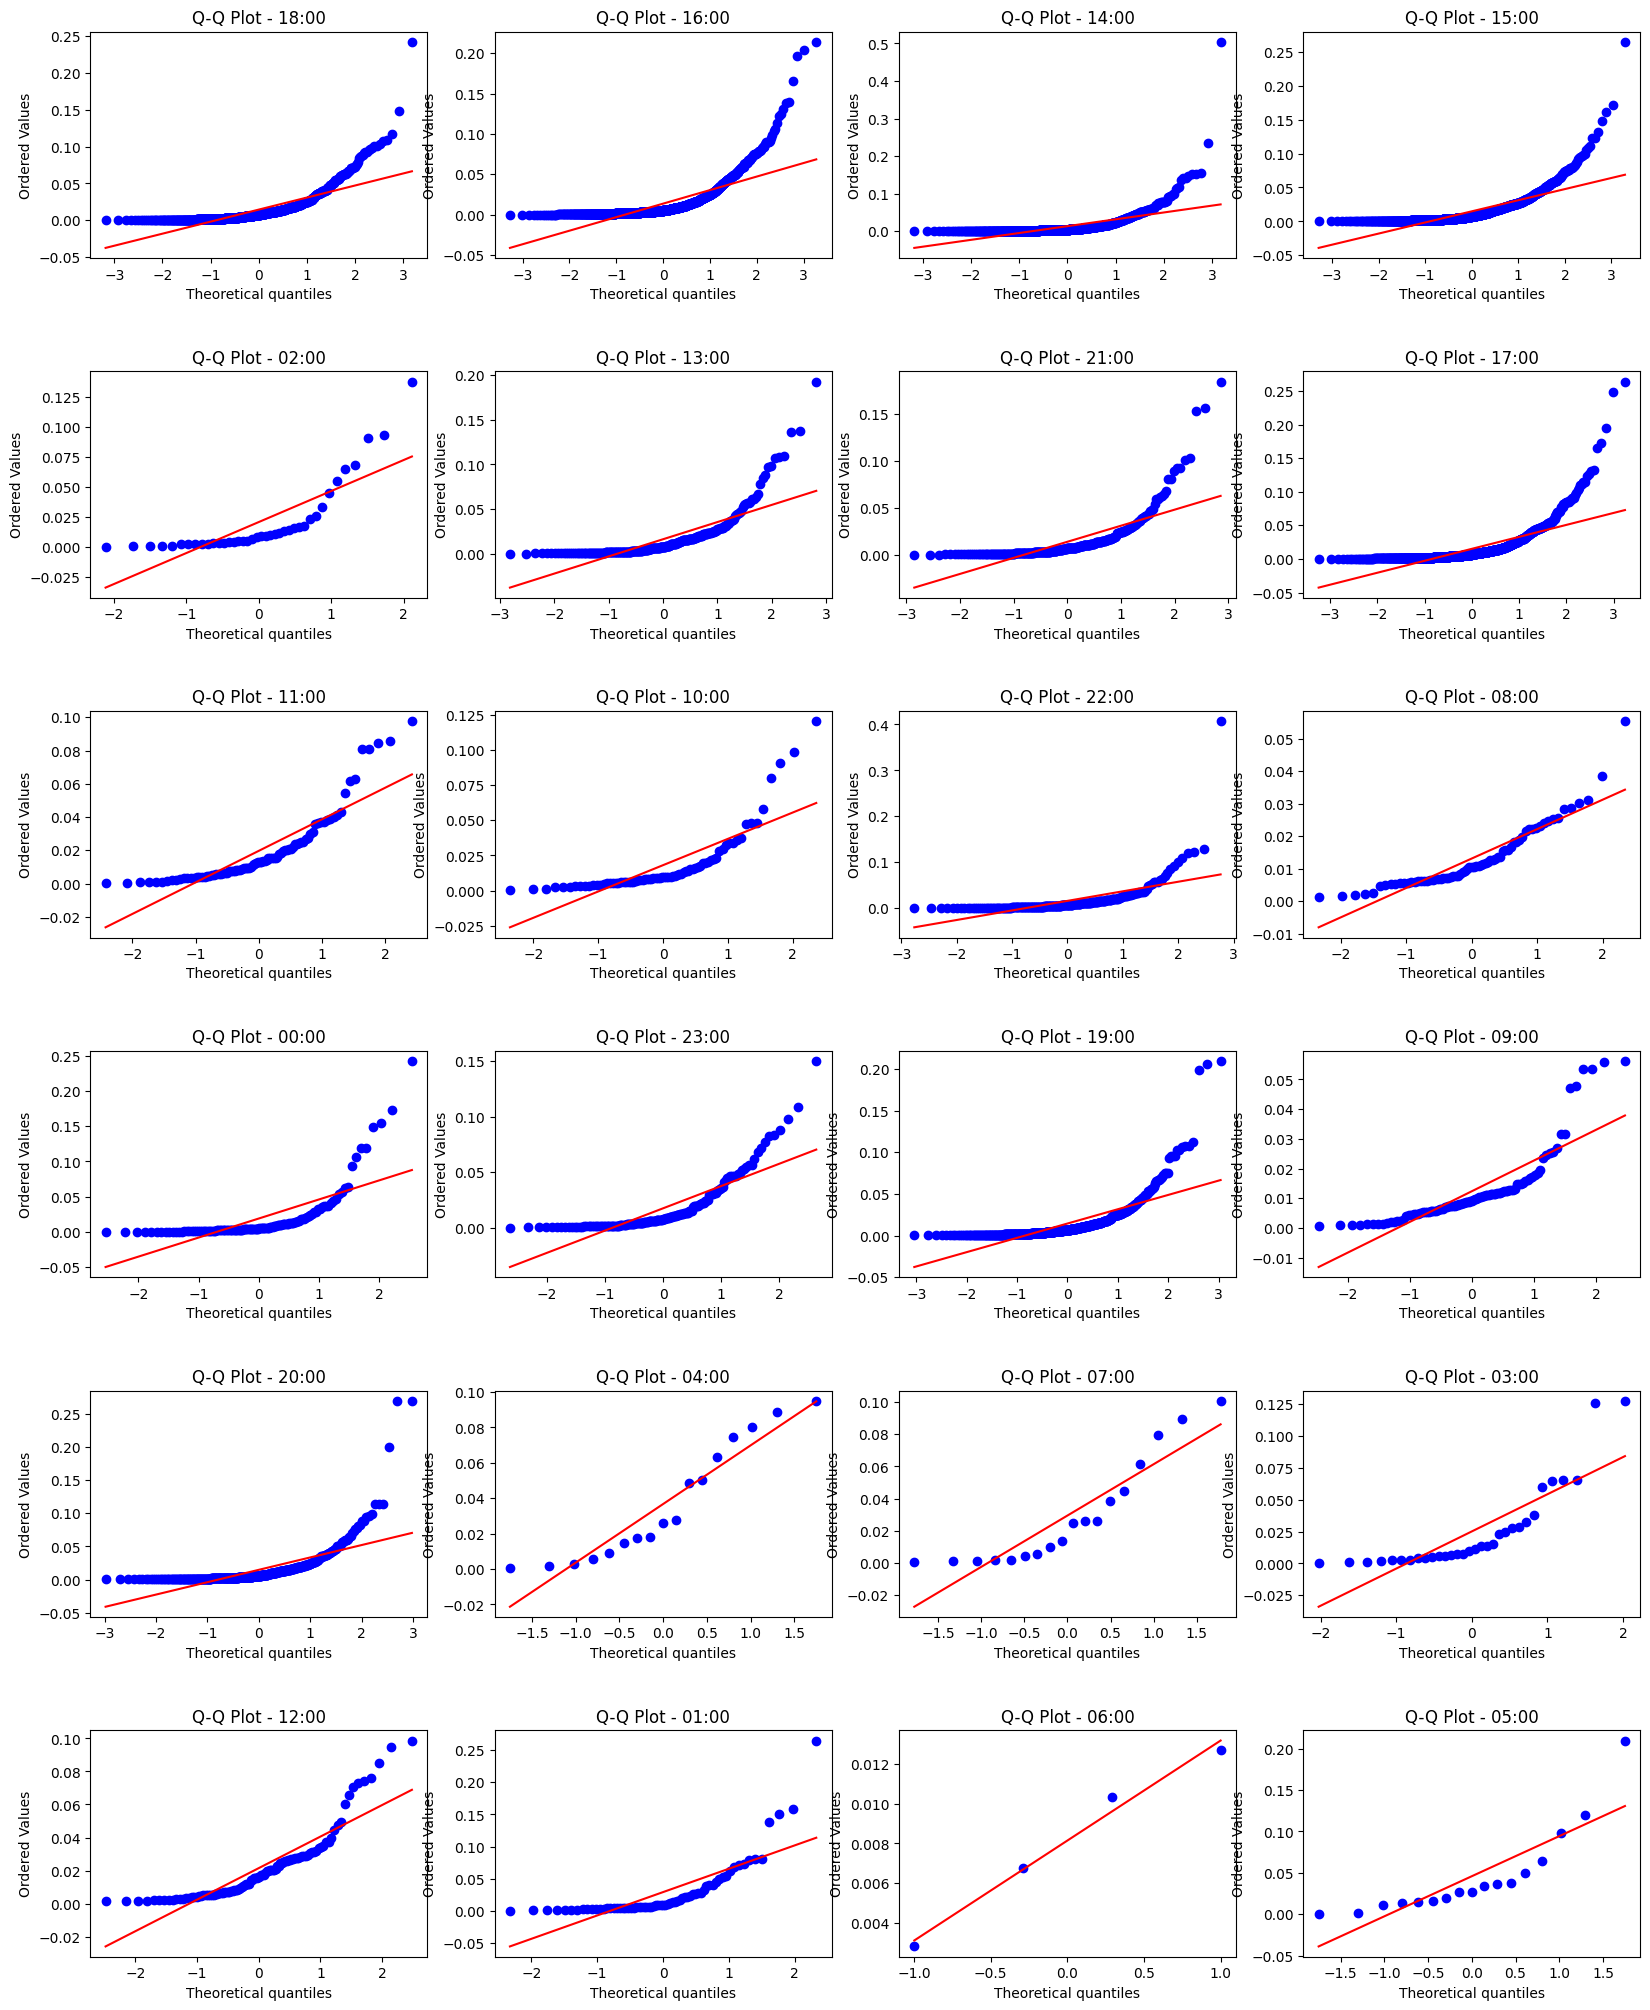


Table of KS test results per timestamp:
     Time  KS-statistic        P-value   Normality
0   18:00      0.500000  2.724257e-218  Not Normal
1   16:00      0.500043  1.209138e-300  Not Normal
2   14:00      0.500058  2.403129e-218  Not Normal
3   15:00      0.500105  1.531604e-321  Not Normal
4   02:00      0.500128   8.901672e-10  Not Normal
5   13:00      0.500002   4.191782e-67  Not Normal
6   21:00      0.500032   9.644004e-75  Not Normal
7   17:00      0.500009  2.572185e-270  Not Normal
8   11:00      0.500136   2.418315e-21  Not Normal
9   10:00      0.500172   4.160906e-18  Not Normal
10  22:00      0.500085   5.947156e-57  Not Normal
11  08:00      0.500527   5.634902e-17  Not Normal
12  00:00      0.500018   1.178013e-29  Not Normal
13  23:00      0.500060   2.259356e-39  Not Normal
14  19:00      0.500134  1.559641e-136  Not Normal
15  09:00      0.500298   6.650396e-24  Not Normal
16  20:00      0.500140  8.702258e-112  Not Normal
17  04:00      0.500309   1.848242e-04  N

In [34]:
# Controleer of de 'post_time' kolom aanwezig is en correct geformatteerd
IG_data['time'] = IG_data['time'].astype('category')

# Lijst van unieke tijdstippen
unique_timesIG = IG_data['time'].unique()

# Maak een lijst om de KS-statistieken, p-waarden en normaliteit op te slaan
ks_resultsIG = []

# Maak een figure voor de subplots (6 rijen en 4 kolommen)
fig, axes = plt.subplots(6, 4, figsize=(20, 25))
fig.subplots_adjust(hspace=0.5)

# Loop door elk tijdstip
for i, time in enumerate(unique_timesIG):
    row = i // 4  # Bepaal de rij voor het subplot
    col = i % 4  # Bepaal de kolom voor het subplot
    
    # Haal de engagement scores voor het specifieke tijdstip
    time_dataIG = IG_data[IG_data['time'] == time]['engagement_score']
    
    # Voer de Kolmogorov-Smirnov test uit tegen de normale verdeling
    ks_stat, ks_p_value = stats.kstest(time_dataIG, 'norm')

    # Voeg de resultaten toe aan de lijst
    normality_status = "Normal" if ks_p_value > 0.05 else "Not Normal"
    ks_resultsIG.append([time, ks_stat, ks_p_value, normality_status])
    
    # Print de resultaten in de console
    print(f"\nKolmogorov-Smirnov Test results for {time}:")
    print("KS-statistic:", ks_stat)
    print("P-value:", ks_p_value)

    if ks_p_value > 0.05:
        print(f"The data for {time} is normally distributed.")
    else:
        print(f"The data for {time} is not normally distributed.")

    # Maak een Q-Q plot voor visuele inspectie
    stats.probplot(time_dataIG, dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f"Q-Q Plot - {time}")

# Toon de plots
plt.show()

# Maak de resultaten in een tabel zichtbaar
ks_results_dfIG = pd.DataFrame(ks_resultsIG, columns=["Time", "KS-statistic", "P-value", "Normality"])

# Print de tabel met KS-testresultaten
print("\nTable of KS test results per timestamp:")
print(ks_results_dfIG)

In [36]:
# Filter tijdstippen met minder dan een minimum aantal posts (bijvoorbeeld 5)
min_posts = 5
filtered_fb_data = FB_data[FB_data.groupby('time')['engagement_score'].transform('size') >= min_posts]
filtered_ig_data = IG_data[IG_data.groupby('time')['engagement_score'].transform('size') >= min_posts]

# Groepeer de data opnieuw na filtering
fb_time_groups = [filtered_fb_data[filtered_fb_data['time'] == time]['engagement_score'] for time in filtered_fb_data['time'].unique()]
ig_time_groups = [filtered_ig_data[filtered_ig_data['time'] == time]['engagement_score'] for time in filtered_ig_data['time'].unique()]

# Voer de Kruskal-Wallis test opnieuw uit
kruskal_test_FB = stats.kruskal(*fb_time_groups)
kruskal_test_IG = stats.kruskal(*ig_time_groups)

# Toon de resultaten van de Kruskal-Wallis test
print("\nKruskal-Wallis Test voor Facebook:")
print("Facebook Kruskal-Wallis statistic:", kruskal_test_FB.statistic)
print("Facebook p-value:", kruskal_test_FB.pvalue)

print("\nKruskal-Wallis Test voor Instagram:")
print("Instagram Kruskal-Wallis statistic:", kruskal_test_IG.statistic)
print("Instagram p-value:", kruskal_test_IG.pvalue)



Kruskal-Wallis Test voor Facebook:
Facebook Kruskal-Wallis statistic: 232.40657704608387
Facebook p-value: 1.5259865341326394e-36

Kruskal-Wallis Test voor Instagram:
Instagram Kruskal-Wallis statistic: 178.89834388074516
Instagram p-value: 1.4438980395856372e-26



Dunn’s Test for Facebook


,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
00:00,1.000000,1.000000,1.000000,1.000000,0.000777,1.0,1.000000,1.0,0.004036,4.907197e-03,...,1.000000e+00,3.526844e-01,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
01:00,1.000000,1.000000,1.000000,1.000000,0.038122,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
02:00,1.000000,1.000000,1.000000,1.000000,0.036296,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
03:00,1.000000,1.000000,1.000000,1.000000,0.779036,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
04:00,0.000777,0.038122,0.036296,0.779036,1.000000,1.0,0.202957,1.0,1.000000,1.000000e+00,...,4.286954e-02,7.397148e-02,1.818197e-04,1.337741e-03,0.003697,1.222290e-03,2.258411e-04,0.000655,1.846999e-04,0.001178
05:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
06:00,1.000000,1.000000,1.000000,1.000000,0.202957,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
07:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
08:00,0.004036,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000e+00,...,7.986840e-01,1.000000e+00,9.125321e-06,8.614519e-04,0.008017,1.104438e-03,4.110875e-05,0.000651,9.312496e-05,0.004217
09:00,0.004907,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.050658e-07,9.146838e-05,0.002457,2.137513e-04,3.004365e-06,0.000206,2.540108e-05,0.003683



Dunn’s Test for Instagram


,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
00:00,1.000000,0.387341,1.0,1.0,0.272412,0.028050,1.0,1.0,0.397188,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
01:00,0.387341,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.449768e-03,1.000000e+00,2.042201e-02,1.000000,1.000000,0.948569,0.135773,0.273942,1.000000,1.000000
02:00,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
03:00,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
04:00,0.272412,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,3.332489e-02,1.000000e+00,1.134711e-01,0.766921,0.984846,0.677773,0.240854,0.314536,0.722655,1.000000
05:00,0.028050,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,2.157253e-03,1.693148e-01,8.787182e-03,0.081994,0.110625,0.072102,0.021664,0.030204,0.081441,0.380876
06:00,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
07:00,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
08:00,0.397188,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.338942e-03,1.000000e+00,1.963450e-02,1.000000,1.000000,0.966354,0.135331,0.276591,1.000000,1.000000
09:00,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,3.469184e-02,1.000000e+00,4.861540e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


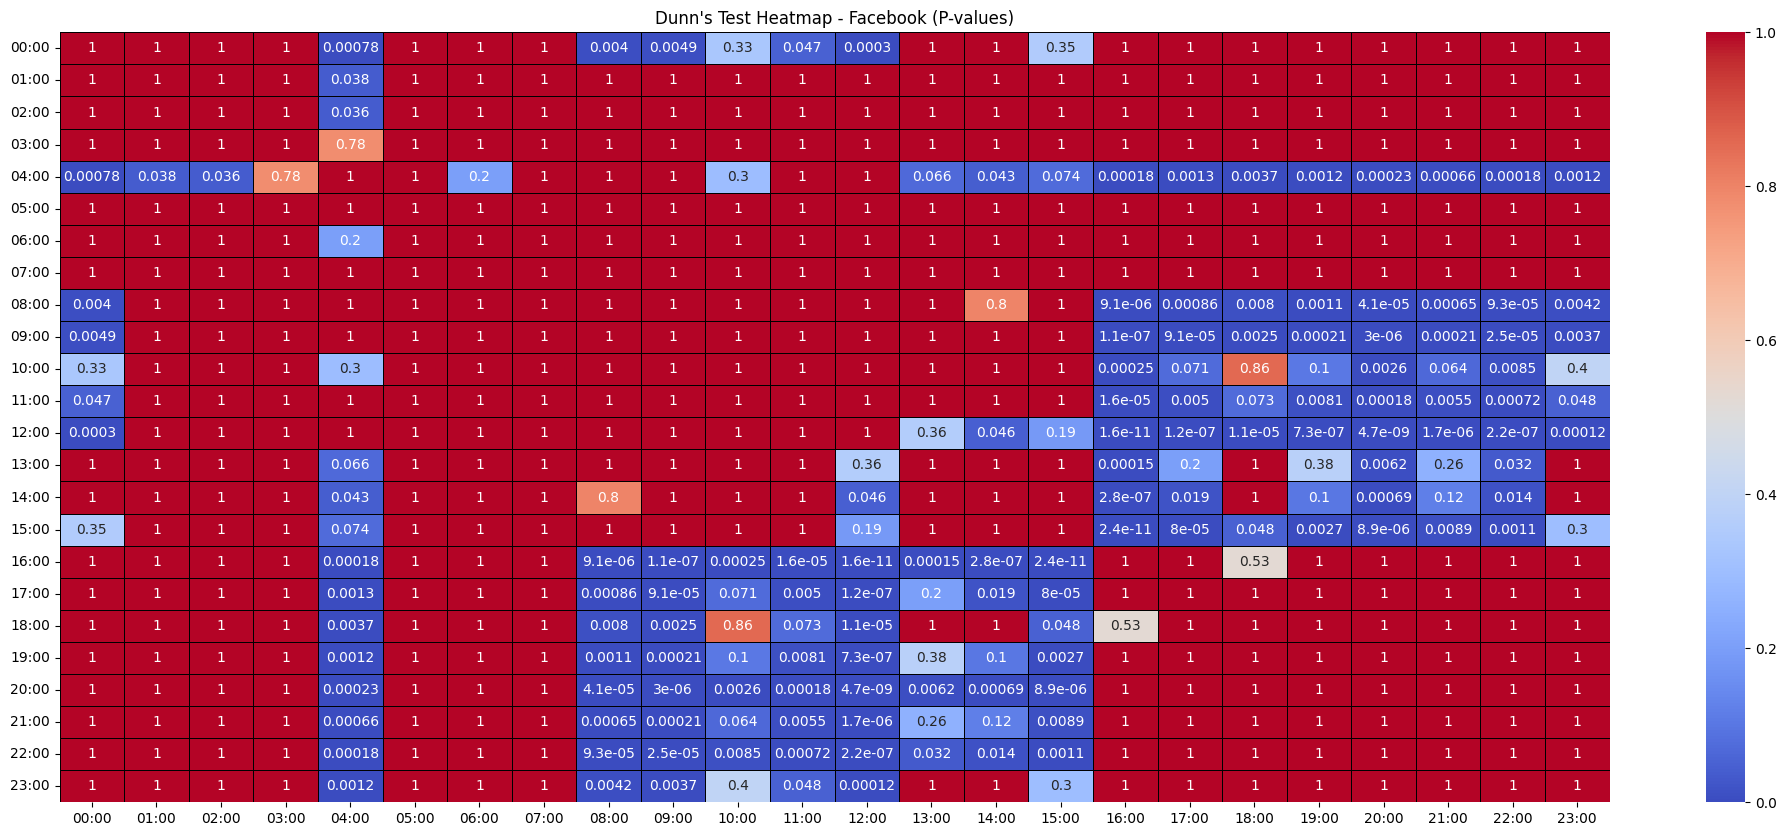

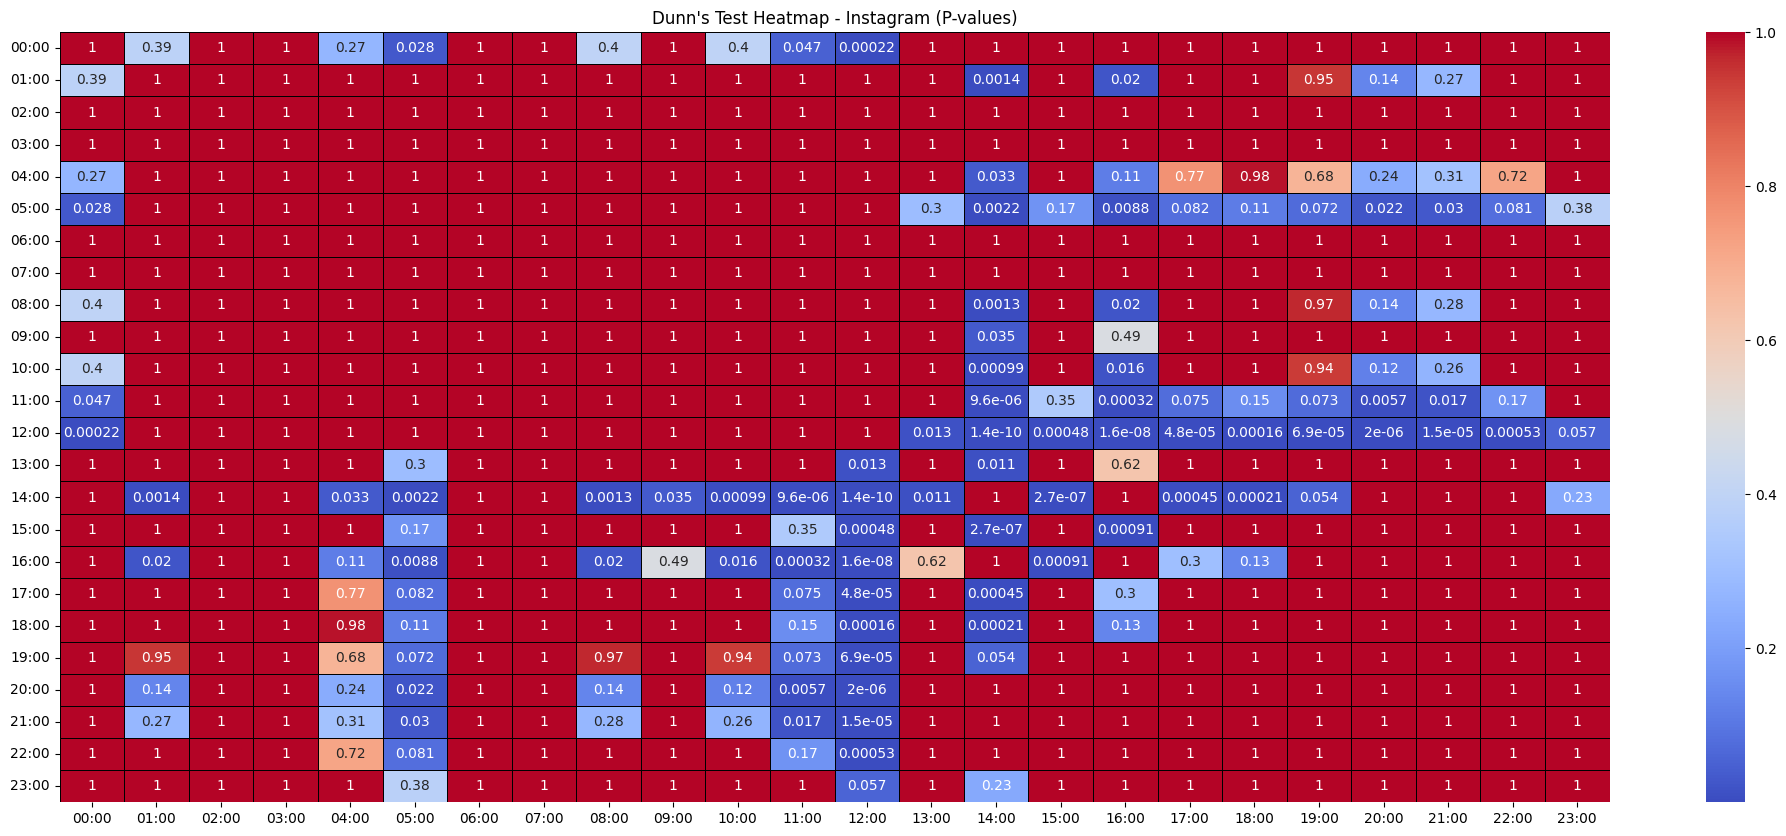

In [42]:
# Facebook Dunn’s Test
print("\nDunn’s Test for Facebook")
dunn_testTime_fb = sp.posthoc_dunn(FB_data, val_col='engagement_score', group_col='time', p_adjust='bonferroni')
display(dunn_testTime_fb)

# Instagram Dunn’s Test
print("\nDunn’s Test for Instagram")
dunn_testTime_ig = sp.posthoc_dunn(IG_data, val_col='engagement_score', group_col='time', p_adjust='bonferroni')
display(dunn_testTime_ig)

# Heatmap for Facebook
plt.figure(figsize=(25, 10))
sns.heatmap(dunn_testTime_fb, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title("Dunn's Test Heatmap - Facebook (P-values)")
plt.show()

# Heatmap for Instagram
plt.figure(figsize=(25, 10))
sns.heatmap(dunn_testTime_ig, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title("Dunn's Test Heatmap - Instagram (P-values)")
plt.show()

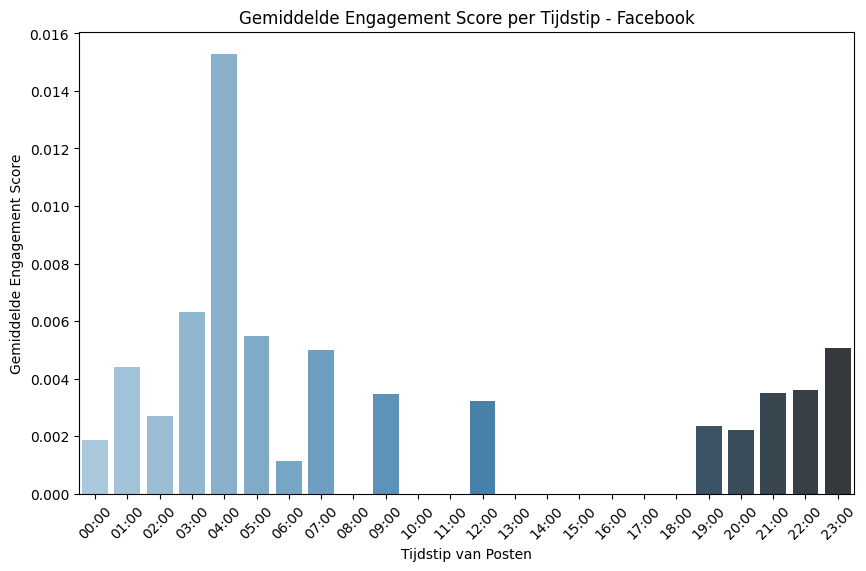

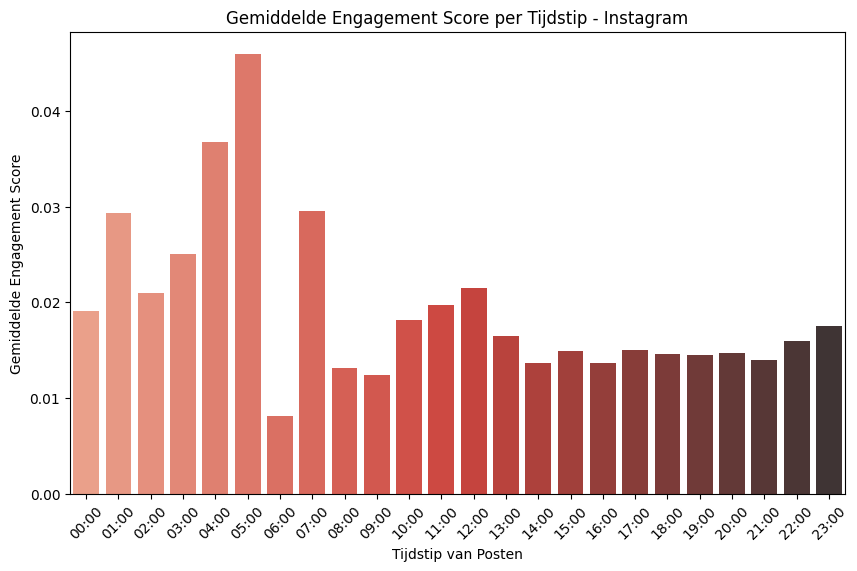

In [ ]:
# Bereken de gemiddelde engagement score per tijdstip voor Facebook
fb_avg_engagement = FB_data.groupby('time')['engagement_score'].mean()

# Bereken de gemiddelde engagement score per tijdstip voor Instagram
ig_avg_engagement = IG_data.groupby('time')['engagement_score'].mean()

# Plot voor Facebook
plt.figure(figsize=(10, 6))
sns.barplot(x=fb_avg_engagement.index, y=fb_avg_engagement.values, palette='Blues_d')
plt.title('Average Engagement Score per timestamp - Facebook')
plt.xlabel('Timestamp of posting')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.show()

# Plot voor Instagram
plt.figure(figsize=(10, 6))
sns.barplot(x=ig_avg_engagement.index, y=ig_avg_engagement.values, palette='Reds_d')
plt.title('Average Engagement Score per timestamp - Instagram')
plt.xlabel('Timestamp of posting')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.show()

In [21]:
from rpy2 import robjects
robjects.r('.libPaths("/opt/anaconda3/envs/DMS/lib/R/library")')

In [34]:
# Setting up the model for FB
model_fb_likes = Lmer('`number_of_likes` ~ day + (1|profile)', data=FB_data)
# model_fb_total_likes = Lmer('`total_likes` ~ day + (1|profile)', data=FB_data)
model_fb_comments = Lmer('`number_of_comments` ~ day + (1|profile)', data=FB_data)

# Model fitting
results_fb_likes = model_fb_likes.fit()
# results_fb_total_likes = model_fb_total_likes.fit()
results_fb_comments = model_fb_comments.fit()
# Show results
print("Facebook Model Results:")
print(results_fb_likes)
# print(results_fb_total_likes)
print(results_fb_comments)

/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "time". Fall back to string conversion. The error is: <class 'datetime.time'>
  warnings.warn('Error while trying to convert '
/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "picture posts". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'int'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '


Linear mixed model fit by REML [’lmerMod’]
Formula: `number_of_likes`~day+(1|profile)

Family: gaussian	 Inference: parametric

Number of observations: 11822	 Groups: {'profile': 11.0}

Log-likelihood: -116394.149 	 AIC: 232806.298

Random effects:

                 Name           Var       Std
profile   (Intercept)  1.214095e+06  1101.860
Residual               2.094196e+07  4576.239

No random effect correlations specified

Fixed effects:



/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "video-posts". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'str'> and <class 'int'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '
/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "post comments positive sentiment share". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '
/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/rpy2/robjects/pandas

Linear mixed model fit by REML [’lmerMod’]
Formula: `number_of_comments`~day+(1|profile)

Family: gaussian	 Inference: parametric

Number of observations: 11822	 Groups: {'profile': 11.0}

Log-likelihood: -95972.849 	 AIC: 191963.698

Random effects:

                 Name         Var      Std
profile   (Intercept)   66969.957  258.786
Residual               659975.291  812.389

No random effect correlations specified

Fixed effects:

Facebook Model Results:
              Estimate   2.5_ci   97.5_ci       SE         DF  T-stat  P-val  \
(Intercept)   1111.902  431.566  1792.238  347.117     11.416   3.203  0.008   
dayMonday      -82.549 -367.537   202.438  145.405  11807.964  -0.568  0.570   
daySaturday    -40.718 -407.152   325.716  186.959  11811.993  -0.218  0.828   
daySunday       24.303 -387.200   435.806  209.954  11813.858   0.116  0.908   
dayThursday   -263.533 -528.292     1.227  135.084  11810.960  -1.951  0.051   
dayTuesday    -140.298 -412.043   131.447  138.648  11808

/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "external links". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '
/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
